<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>UnSupervised Learning Project : Tread & Ahead</font></center>

## Project Description


---



**Context**

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax
benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one
can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential
losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an
individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across
different market segments and help protect against risks that could make the portfolio vulnerable to losses.


**Objective**

Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.


## Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

**Data Dictionary**

**Ticker Symbol**: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market

**Company**: Name of the company

**GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

**GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

**Current Price**: Current stock price in dollars

**Price Change**: Percentage change in the stock price in 13 weeks

**Volatility**: Standard deviation of the stock price over the past 13 weeks

**ROE**: A measure of financial performance calculated by dividing net income by shareholders' equity(shareholders' equity is equal to a company's assets minus its debt)

**Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities

**Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars)

**Net Income**: Revenues minus expenses, interest, and taxes (in dollars)

**Earnings Per Share**: Company's net profit divided by the number of common shares it has outstanding (in dollars)

**Estimated Shares Outstanding**: Company's stock is currently held by all its shareholders

**P/E Ratio**: Ratio of the company's current stock price to the earnings per share

**P/B Ratio**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Import required libraries

In [1]:
# For data loading, manipulation and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit, time
import plotly.express as px

In [2]:
# For pre-processing, model building and metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# dummy data sets
from sklearn.datasets import make_blobs

In [3]:
# visualize the clustering efficiency
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer

In [4]:
# dimensionality reduction
from sklearn.decomposition import PCA

## Configure Section

In [5]:
# Enable the plots inline for the notebook output
%matplotlib inline

# path to the data set
path = '/content/drive/MyDrive/UnSupervisedLearning/stock_data.csv'

# float format for Pandas data frame
pd.options.display.float_format = '{:.2f}'.format

# plot default size for visualization
plt.rcParams['figure.figsize'] = (10,5)

# set the sns style
sns.set_style("white")

## Load the Dataset

In [6]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# read the dataset and take the backup
stock_data = pd.read_csv(path)
df = stock_data.copy()
dfas = stock_data.copy()

## Overview of the data

In [8]:
# understand the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**:

**Integer fields** : ROE, Cash Ratio, Net Cash Flow, Net Income

**Float fields** : Earnings Per Share, Estimated Shares Outstanding, P/E Ratio, P/B Ratio

**Object fields** : Ticker Symbol, Security, GICS Sector, GICS Sub Industry


* The fields seems set with correct data type

* The required memory for the data set is about **40** KB

In [9]:
# check the rows and columns
df.shape

(340, 15)

**Observations**:

There are 340 rows and 15 columns in the data set.

In [10]:
# check the first 5 rows
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines          42.35         10.00        1.69  135   
1        Pharmaceuticals          59.24          8.34        2.20  130   
2  Health Care Equipment          44.91         11.30        1.27   21   
3   Application Software          93.94         13.98        1.36    9   
4         Semiconductors          55.32         -1.83        1.70   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                  668129938.50       3.72      -8.78  
1                 1633015873.00      18.81      -8.75  
2                 1504421769.00      15.28      -0.39  
3                  499643650.80      74.56       4.20  
4                 2247993548.00     178.45       1.06

In [11]:
# print random 5 rows
df.sample(5)

Ticker Symbol                        Security  \
317            VZ          Verizon Communications   
38            AXP             American Express Co   
139           GGP  General Growth Properties Inc.   
57            CCL                  Carnival Corp.   
329           XEL                 Xcel Energy Inc   

                     GICS Sector                       GICS Sub Industry  \
317  Telecommunications Services  Integrated Telecommunications Services   
38                    Financials                        Consumer Finance   
139                  Real Estate                            Retail REITs   
57        Consumer Discretionary          Hotels, Resorts & Cruise Lines   
329                    Utilities                          MultiUtilities   

     Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
317          46.22          6.28        0.84  109          14    -6128000000   
38           69.55         -6.22        0.90   25          99      474000000   
139          27.21          4.21        1.39   17          47      -15576000   
57           54.48          8.94        1.35    7          20     1064000000   
329          35.91          1.38        1.02    9           2        5332000   

      Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
317  17879000000                4.38                 4081963470.00      10.55   
38    5163000000                3.90                  506660363.00      10.26   
139   1374561000                3.04                  158299350.60      47.37   
57    1757000000                2.26                  777433628.30      24.11   
329    984485000                1.94                  507466494.80      18.51   

     P/B Ratio  
317     -26.38  
38       -0.61  
139      -3.97  
57       -7.48  
329      -2.26

In [12]:
# print last 5 rows
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services          33.26         14.89        1.85   
336                   Restaurants          52.52         -8.70        1.48   
337         Health Care Equipment         102.59          9.35        1.40   
338                Regional Banks          27.30         -1.16        1.47   
339               Pharmaceuticals          47.92         16.68        1.61   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                  939457327.60      28.98       6.26  
336                  435353535.40      17.68      -3.84  
337                  188461538.50     131.53     -23.88  
338                  257892500.00      22.75      -0.06  
339                  498529411.80      70.47       1.72

**Observations**:

* The data seems do not have any abnormal or missing values.

In [13]:
# describe the numerical fields
df.describe(include='number').T

count          mean           std  \
Current Price                340.00         80.86         98.06   
Price Change                 340.00          4.08         12.01   
Volatility                   340.00          1.53          0.59   
ROE                          340.00         39.60         96.55   
Cash Ratio                   340.00         70.02         90.42   
Net Cash Flow                340.00   55537620.59 1946365312.18   
Net Income                   340.00 1494384602.94 3940150279.33   
Earnings Per Share           340.00          2.78          6.59   
Estimated Shares Outstanding 340.00  577028337.75  845849595.42   
P/E Ratio                    340.00         32.61         44.35   
P/B Ratio                    340.00         -1.72         13.97   

                                         min           25%          50%  \
Current Price                           4.50         38.55        59.70   
Price Change                          -47.13         -0.94         4.82   
Volatility                              0.73          1.13         1.39   
ROE                                     1.00          9.75        15.00   
Cash Ratio                              0.00         18.00        47.00   
Net Cash Flow                -11208000000.00 -193906500.00   2098000.00   
Net Income                   -23528000000.00  352301250.00 707336000.00   
Earnings Per Share                    -61.20          1.56         2.90   
Estimated Shares Outstanding     27672156.86  158848216.10 309675137.80   
P/E Ratio                               2.94         15.04        20.82   
P/B Ratio                             -76.12         -4.35        -1.07   

                                       75%            max  
Current Price                        92.88        1274.95  
Price Change                         10.70          55.05  
Volatility                            1.70           4.58  
ROE                                  27.00         917.00  
Cash Ratio                           99.00         958.00  
Net Cash Flow                 169810750.00 20764000000.00  
Net Income                   1899000000.00 24442000000.00  
Earnings Per Share                    4.62          50.09  
Estimated Shares Outstanding  573117457.32  6159292035.00  
P/E Ratio                            31.76         528.04  
P/B Ratio                             3.92         129.06

**Observations**:
*  The mean current price of the stock is 80.86 $ with huge standard deviation of 98.06

* The variability in the price change is huge with average price change as 4.08 and with range of -47 to 55 and standard variation of 12.01

* Most stocks have moderate volatility, but a few are highly volatile.

* Mean ROE is 39.60%, but extremely high std (96.55), indicating some firms have exceptionally high ROE ( 917 is maximum)

* Mean Cash Ratio is 70, but maximum is 958, meaning some firms have a massive cash buffer.

* Huge standard deviation in Net Cash flow, suggesting large variations in cash flow management

* The average Net Income is 340 $. There are firms with huge losses and some firms have profits.

* Mean Earnings per share is $2.78 with standard deviation of 6.59 suggests large disparities. some firms have major losses per share while some are profitable.

* Mean P/E ratio is 32.61 and some stocks are extremely overvalue.

* Mean P/B -1.72 suggesting some companies have negative book values.

In [14]:
# describe the object fields
df.describe(include='object').T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

In [15]:
# value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('-'*40)

Ticker Symbol
AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: count, Length: 340, dtype: int64
----------------------------------------
Security
American Airlines Group    1
NextEra Energy             1
Nucor Corp.                1
Northern Trust Corp.       1
Norfolk Southern Corp.     1
                          ..
Equity Residential         1
Equinix                    1
EOG Resources              1
Eastman Chemical           1
Zoetis                     1
Name: count, Length: 340, dtype: int64
----------------------------------------
GICS Sector
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Na

**Observations**:

* Ticker and Security are unique fields.

* The top sector is Industrials with count of 53

* Many firms are under Oil & Gas Exploration & Production sub category (16)

## Treat missing values

In [16]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations**:

There are no missing values


## Treat duplicate values

In [17]:
df.duplicated().values.any()

False

**Observations**:

No duplicate values observed

## Exploratory Data Analysis

### Univarient Analysis

#### Numeric Features

In [18]:
# This function plots the box plot and histogram for numerical features in univarient analysis
def boxplot_histogram(data, feature, figsize=(15,8), kde=True, bins=None):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
  """
  fig, (axes_box, axes_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.35, 0.65)}, figsize=figsize)

  # boxplot
  sns.boxplot(data=data, x=feature, ax=axes_box, showmeans=True, color="violet")

  # histogram
  if bins :
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde, bins=bins)
  else:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde)

  # set mean and median in histogram
  axes_hist.axvline(data[feature].mean(), color='green', linestyle='--')
  axes_hist.axvline(data[feature].median(), color='black', linestyle='-')
  plt.show()

In [19]:
# identify numerical features
num_fields = df.select_dtypes(include='number').columns.to_list()
num_fields

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

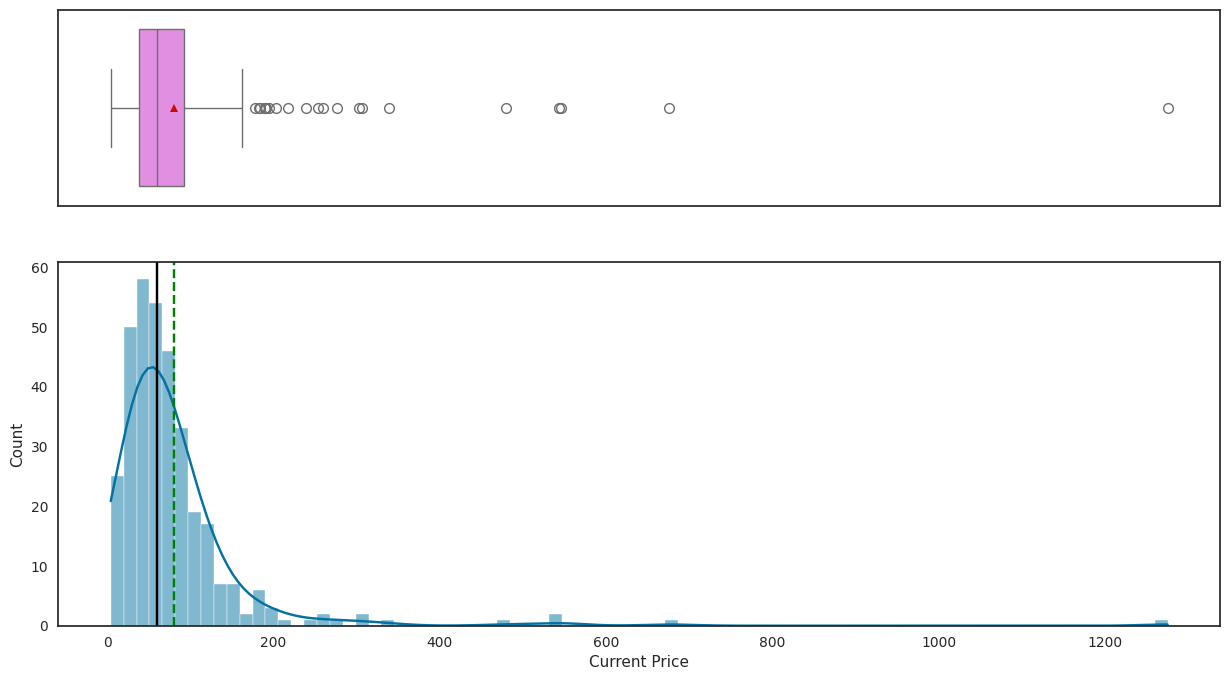

In [20]:
# box and histogram for Current Price
boxplot_histogram(df, 'Current Price')

**Observations**:
* The current price of stock is right skewed.
* Significant outliers are present in the upper bound

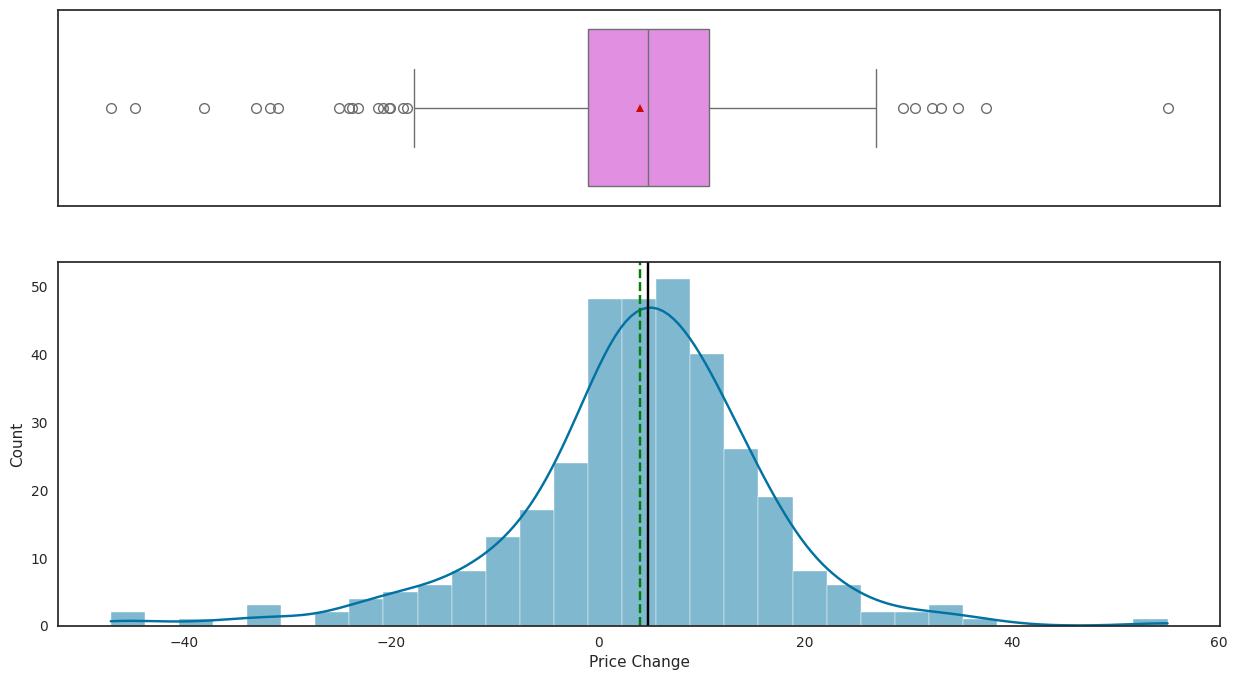

In [21]:
# box and histogram for Price Change
boxplot_histogram(df, 'Price Change')

**Observations**:

* The price change is nearly normally distributed.
* There are outliers on either side of the distribution.

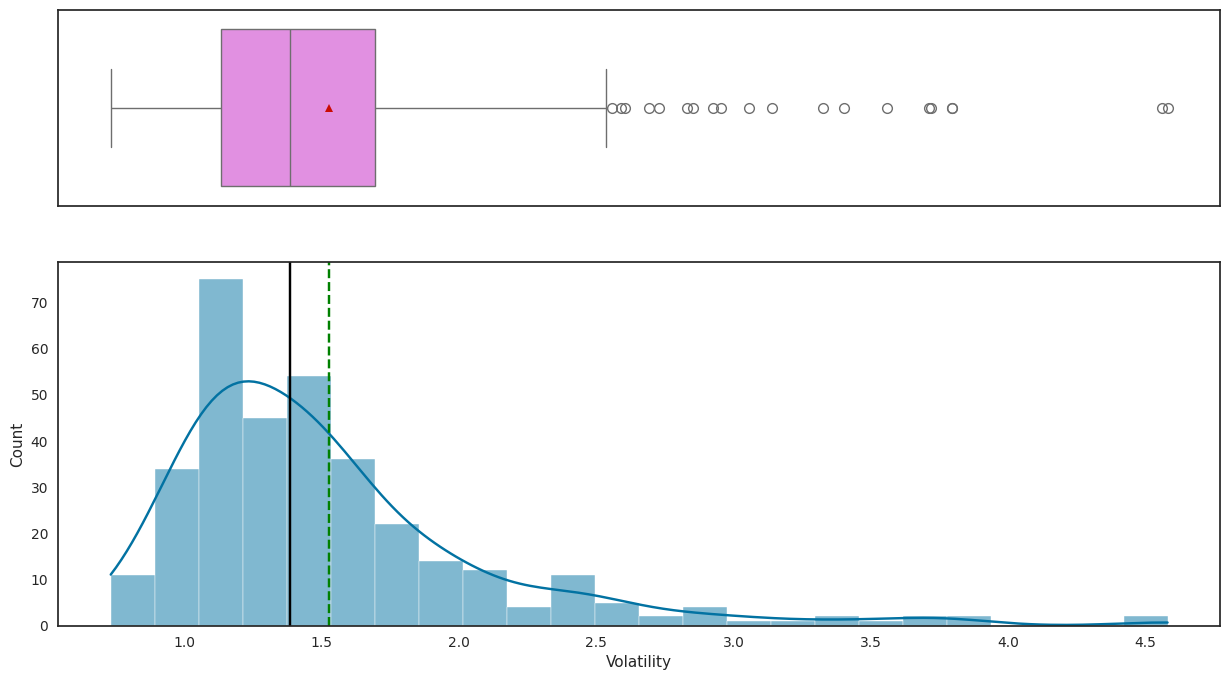

In [22]:
# box and histogram for Volatility
boxplot_histogram(df, 'Volatility')

**Observations**:

* The volatility shows right skewness.
* There are outliers on the right side of the distribution

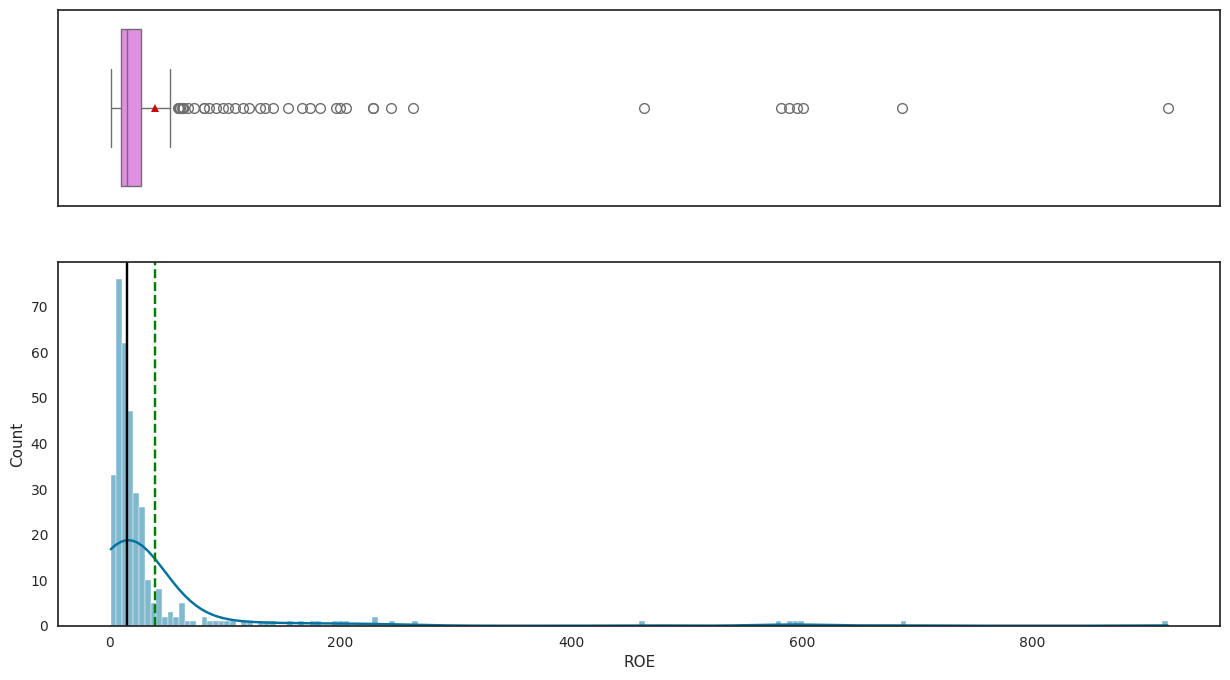

In [23]:
# box and histogram for ROE
boxplot_histogram(df, 'ROE')

**Observations**:

* The Return on Equity (ROE) distribution is right-skewed, indicating a longer tail on the higher end.

* A significant number of outliers are present in the upper bound, suggesting instances of exceptionally high ROE values.

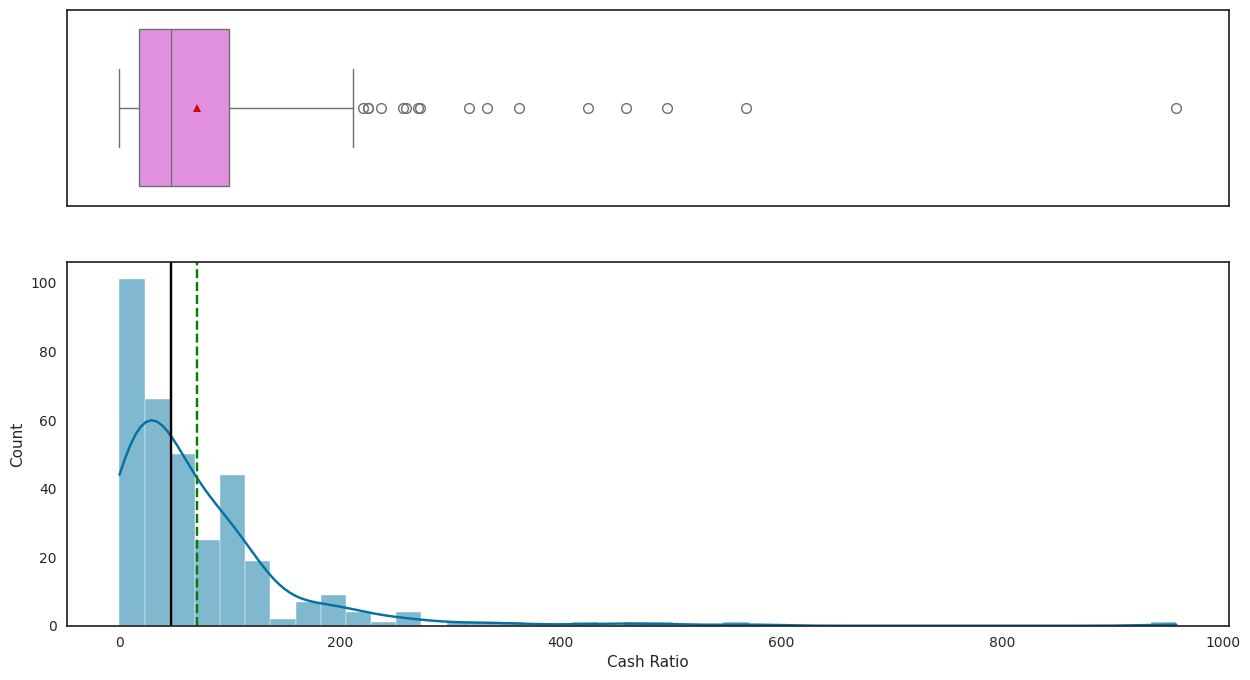

In [24]:
# box and histogram for Cash Ratio
boxplot_histogram(df, 'Cash Ratio')

**Observations**:

* The cash ratio distribution is right-skewed, indicating that most firms have lower liquidity while a few maintain significantly high cash reserves.

* Outliers in the upper bound suggest that some firms have exceptionally strong liquidity positions.

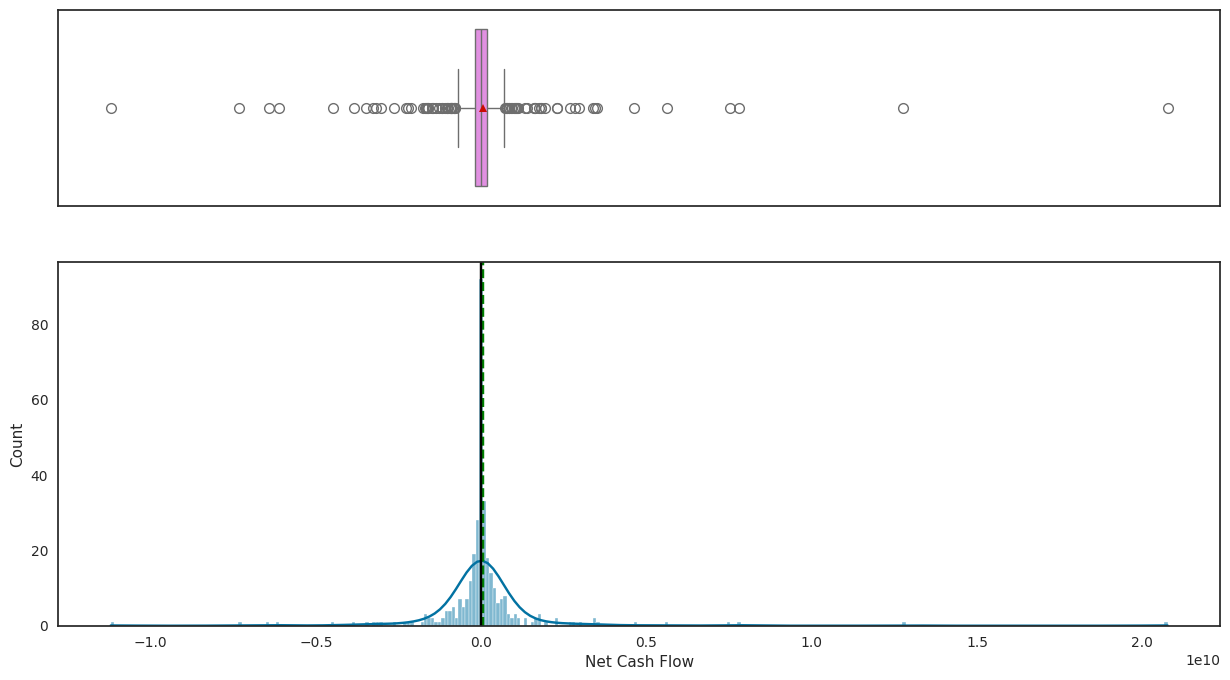

In [25]:
# box and histogram for Net Cash Flow
boxplot_histogram(df, 'Net Cash Flow')

* Net Cash Flow follows normal distribution.
* Outliers on both ends suggest that some firms experience extreme positive or negative cash flows.

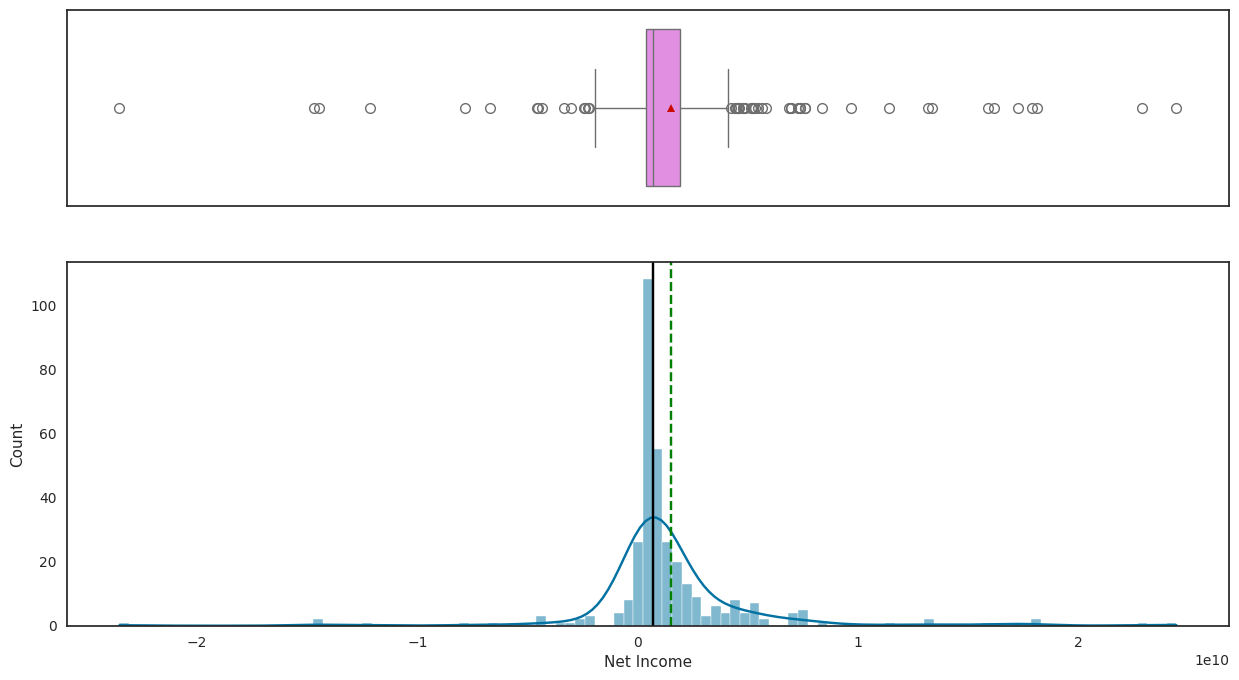

In [26]:
# box and histogram for Net Income
boxplot_histogram(df, 'Net Income')

**Observations**:

* Net income exhibits slight right skewness, suggesting that most firms do not generate exceptionally high profits.

* The presence of both positive and negative outliers indicates that some firms experience significant profits, while others face substantial losses.

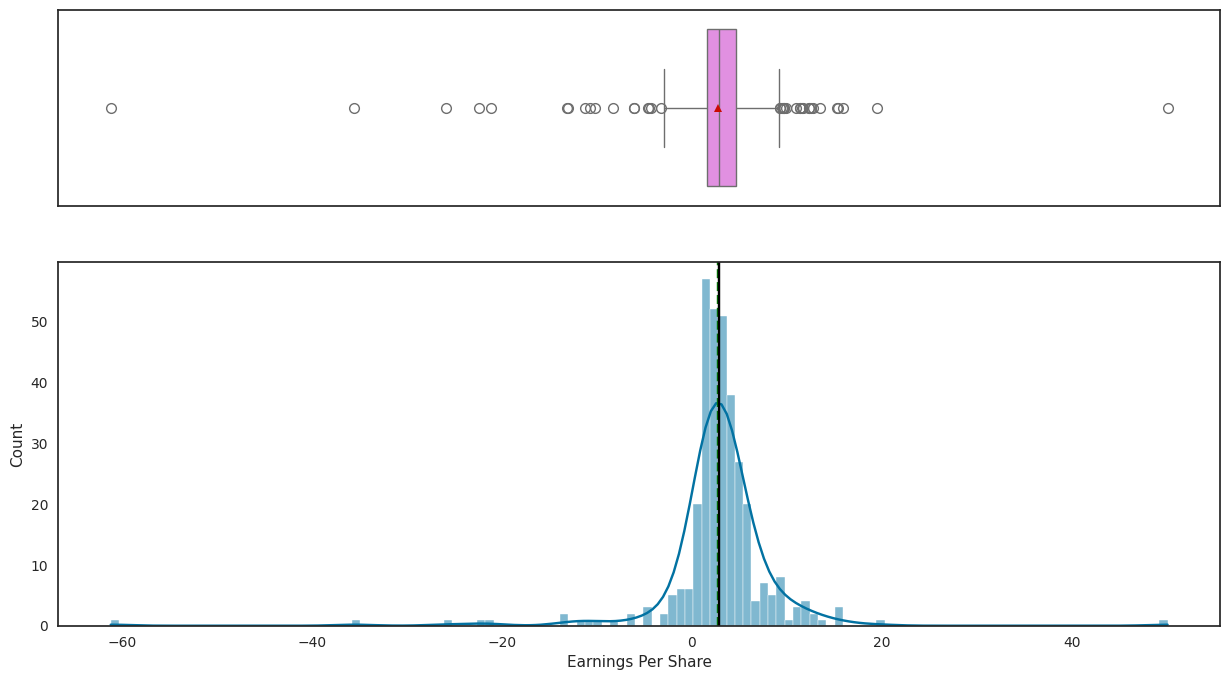

In [27]:
# box and histogram for Earnings Per Share
boxplot_histogram(df, 'Earnings Per Share')

**Observations**:

* Earnings Per Share follows a normal distribution.
* Outliers are present on both ends, indicating that some firms have significantly higher or lower earnings per share compared to the majority.

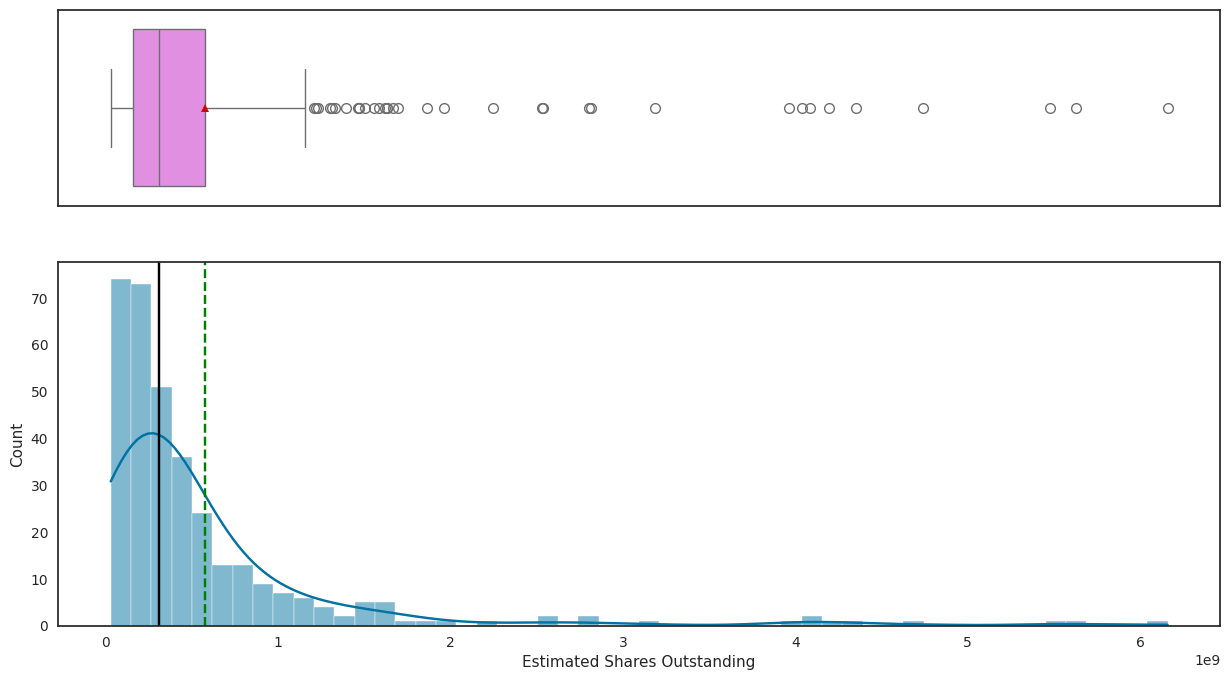

In [28]:
# box and histogram for Estimated Shares Outstanding
boxplot_histogram(df, 'Estimated Shares Outstanding')

**Observations**:

* Estimated Shares Outstanding distribution is right skewed.
* There are outliers in the upper bound, indicating that some firms have significantly higher shares outstanding than the majority

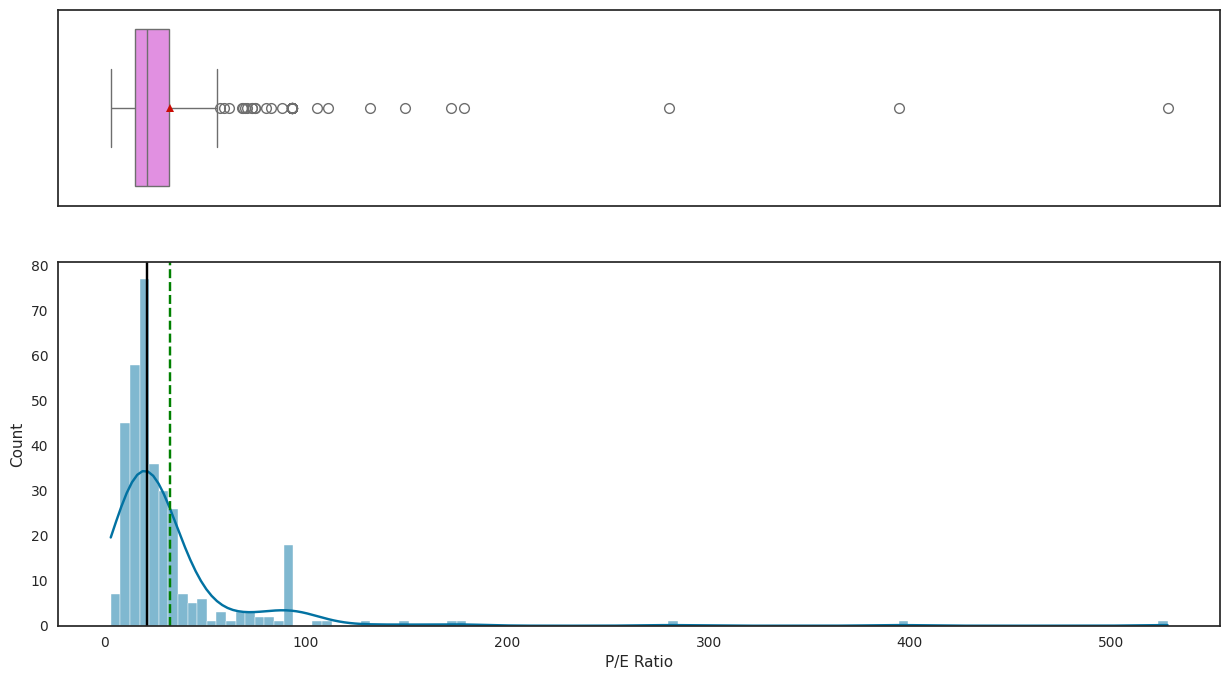

In [29]:
# box and histogram for P/E Ratio
boxplot_histogram(df, 'P/E Ratio')

**Observations**:

* The Price-to-Earnings (P/E) ratio distribution is right-skewed, indicating that most firms have lower P/E ratios, while a few have exceptionally high values.

* There are numerous outliers in the upper bound, suggesting that some firms are highly overvalued relative to their earnings.

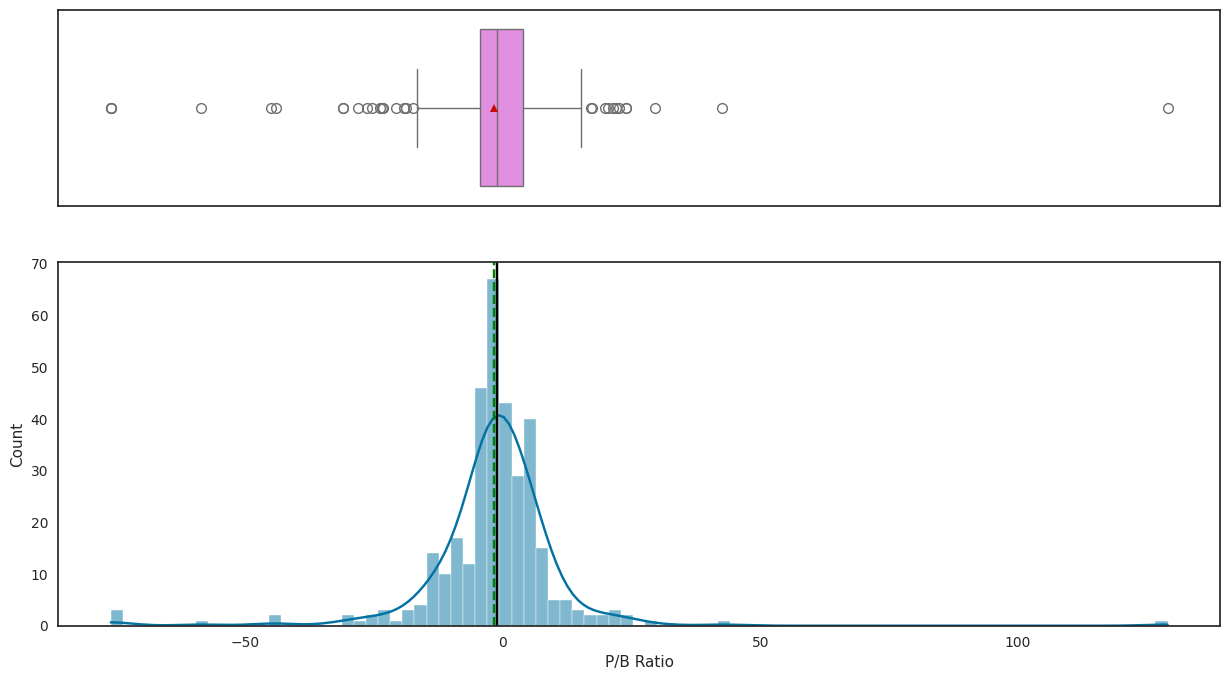

In [30]:
# box and histogram for P/B Ratio
boxplot_histogram(df, 'P/B Ratio')

**Observations**:

* The Price-to-Book P/B Ratio follows normal distribution.

* There are outliers on both ends of the distribution, suggesting that some firms are either significantly undervalued or overvalued relative to their book value

### Categorical fields

In [31]:
# plot a barplot with labels for given features
def labelled_barplot(data, features,cols=1,figsize=None, legend=True):
  rows = (len(features)+cols - 1)//cols
  if figsize is None:
    plt.figure(figsize=(cols*6,rows*4))
  else:
    plt.figure(figsize=figsize)


  for i,feature in enumerate(features):
    plt.subplot(rows,cols,i+1)
    hue = feature

    ax = sns.countplot(data, x=feature,palette="Paired",hue=hue,order=df[feature].value_counts().index)

    for container in ax.containers:
      ax.bar_label(container, fmt='%d', fontsize=10)
    ax.set_title(f'Count plot - {feature}')

    ax.tick_params(axis='x', rotation=90)
    if legend == False :
      ax.legend_.remove()

  plt.tight_layout()
  plt.show()

In [32]:
# print categorical fields
cat_fields = df.select_dtypes(include='object').columns.to_list()
cat_fields

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

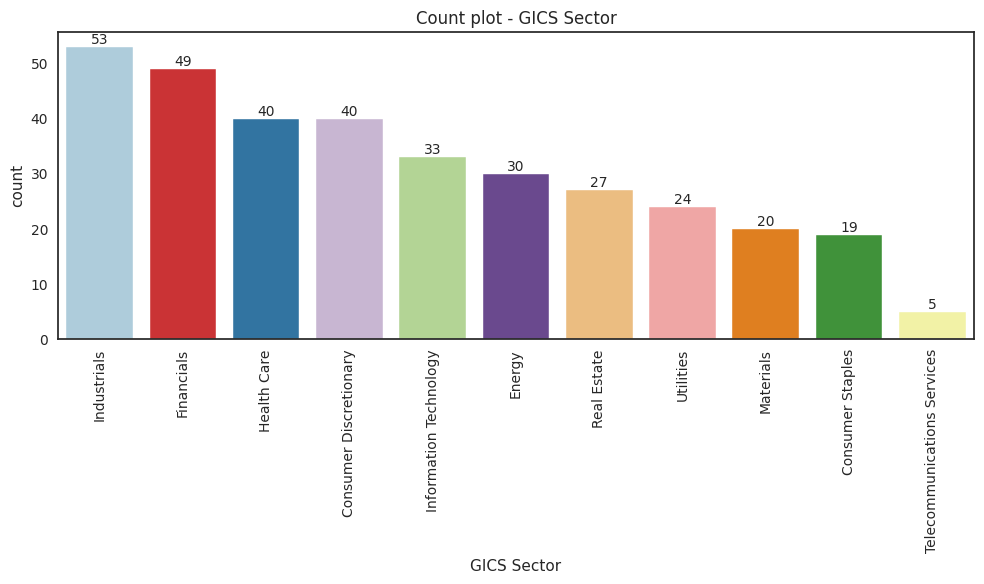

In [33]:
# count plot for GICS sector
labelled_barplot(df, ['GICS Sector'] ,cols=1, figsize=(10,6))

**Observations**:

* There are many firms under Industrials(51) GICS sector.

* The Telecommunications Services sector has the fewest firms, suggesting limited presence.

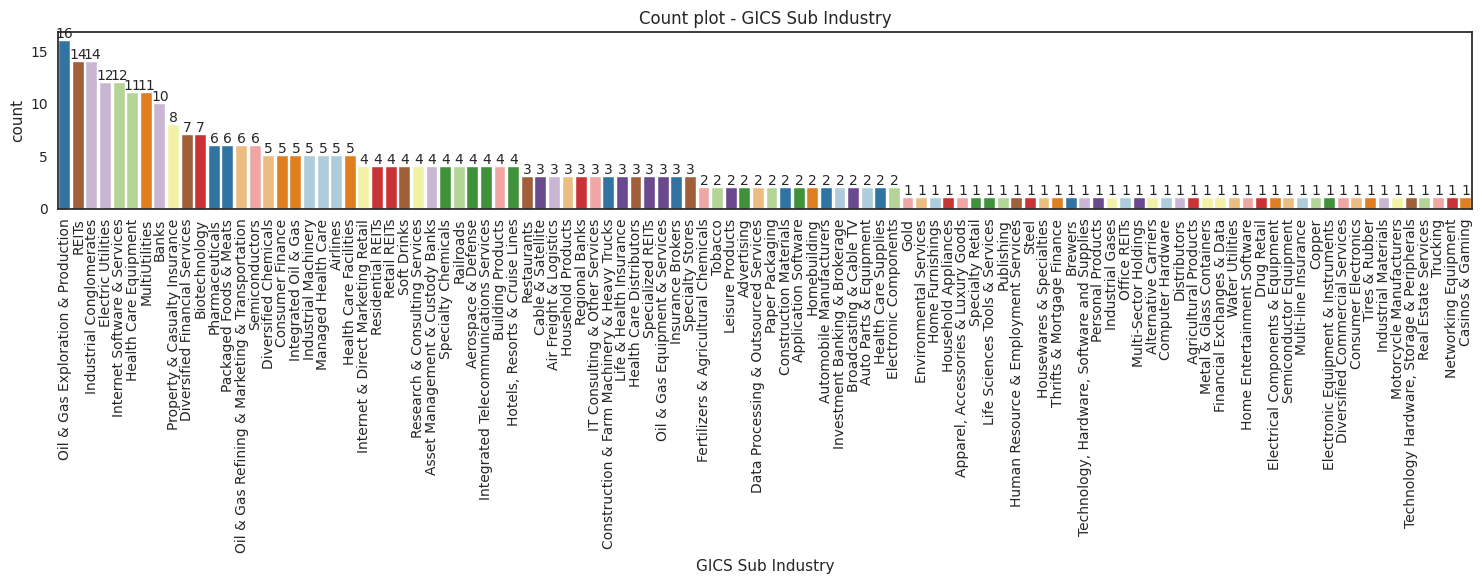

In [34]:
# count plot for GICS Sub Industry
labelled_barplot(df, ['GICS Sub Industry'] ,cols=1, figsize=(15,6))

**Observations**:

* Oil & Gas Exploration & Production firms are more in number.
* There are many firms that are monopoly in many of the GICS Sub Industry.


### Bivarient Analysis

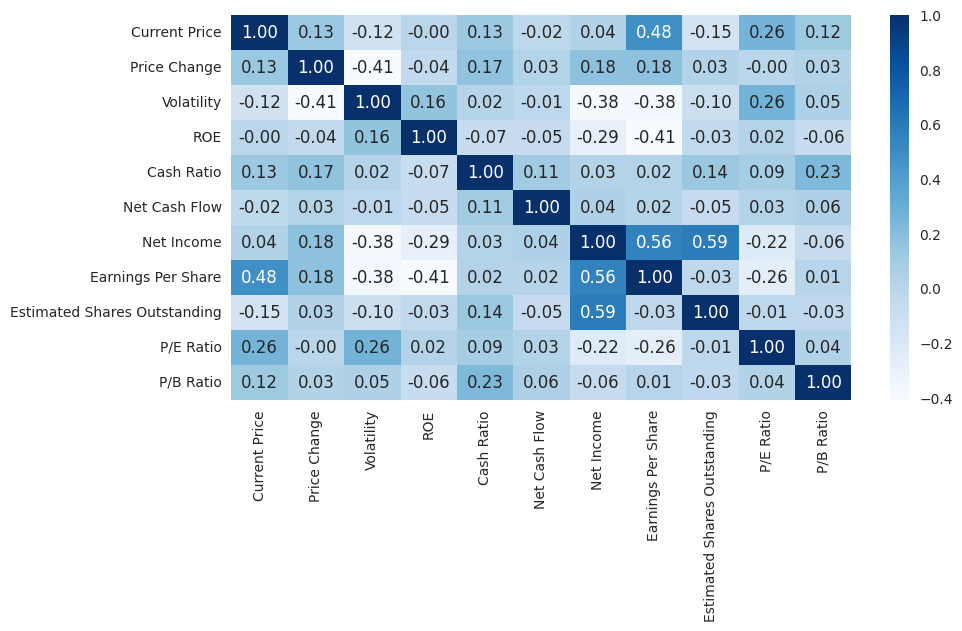

In [35]:
# Analyze correlation between variables using heatmap
# heatmap for numeric fields
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues');

**Observations**:

* Current Price and Earnings Per Share show a strong positive correlation (0.48).

* There is a moderate positive correlation between Current Price and the P/E Ratio (0.26).

* Price change and Volatility have a strong negative correlation (-0.41).

* A weak positive correlation is observed between Volatility and the P/E Ratio (0.26).

* Volatility and Net Income exhibit a moderate negative correlation (-0.38).

* A moderate negative correlation is present between Volatility and Earnings Per Share (-0.38).

* ROE and Earnings Per Share demonstrate a strong negative correlation (-0.41).

* A moderate negative correlation is found between ROE and Net Income (-0.29).

* Cash Ratio and P/B Ratio show a moderate positive correlation (0.23).

* Net Income and Estimated Shares Outstanding have a strong positive correlation (0.59).

* There is a strong positive correlation between Net Income and Earnings Per Share (0.56).

<Figure size 1400x1400 with 0 Axes>

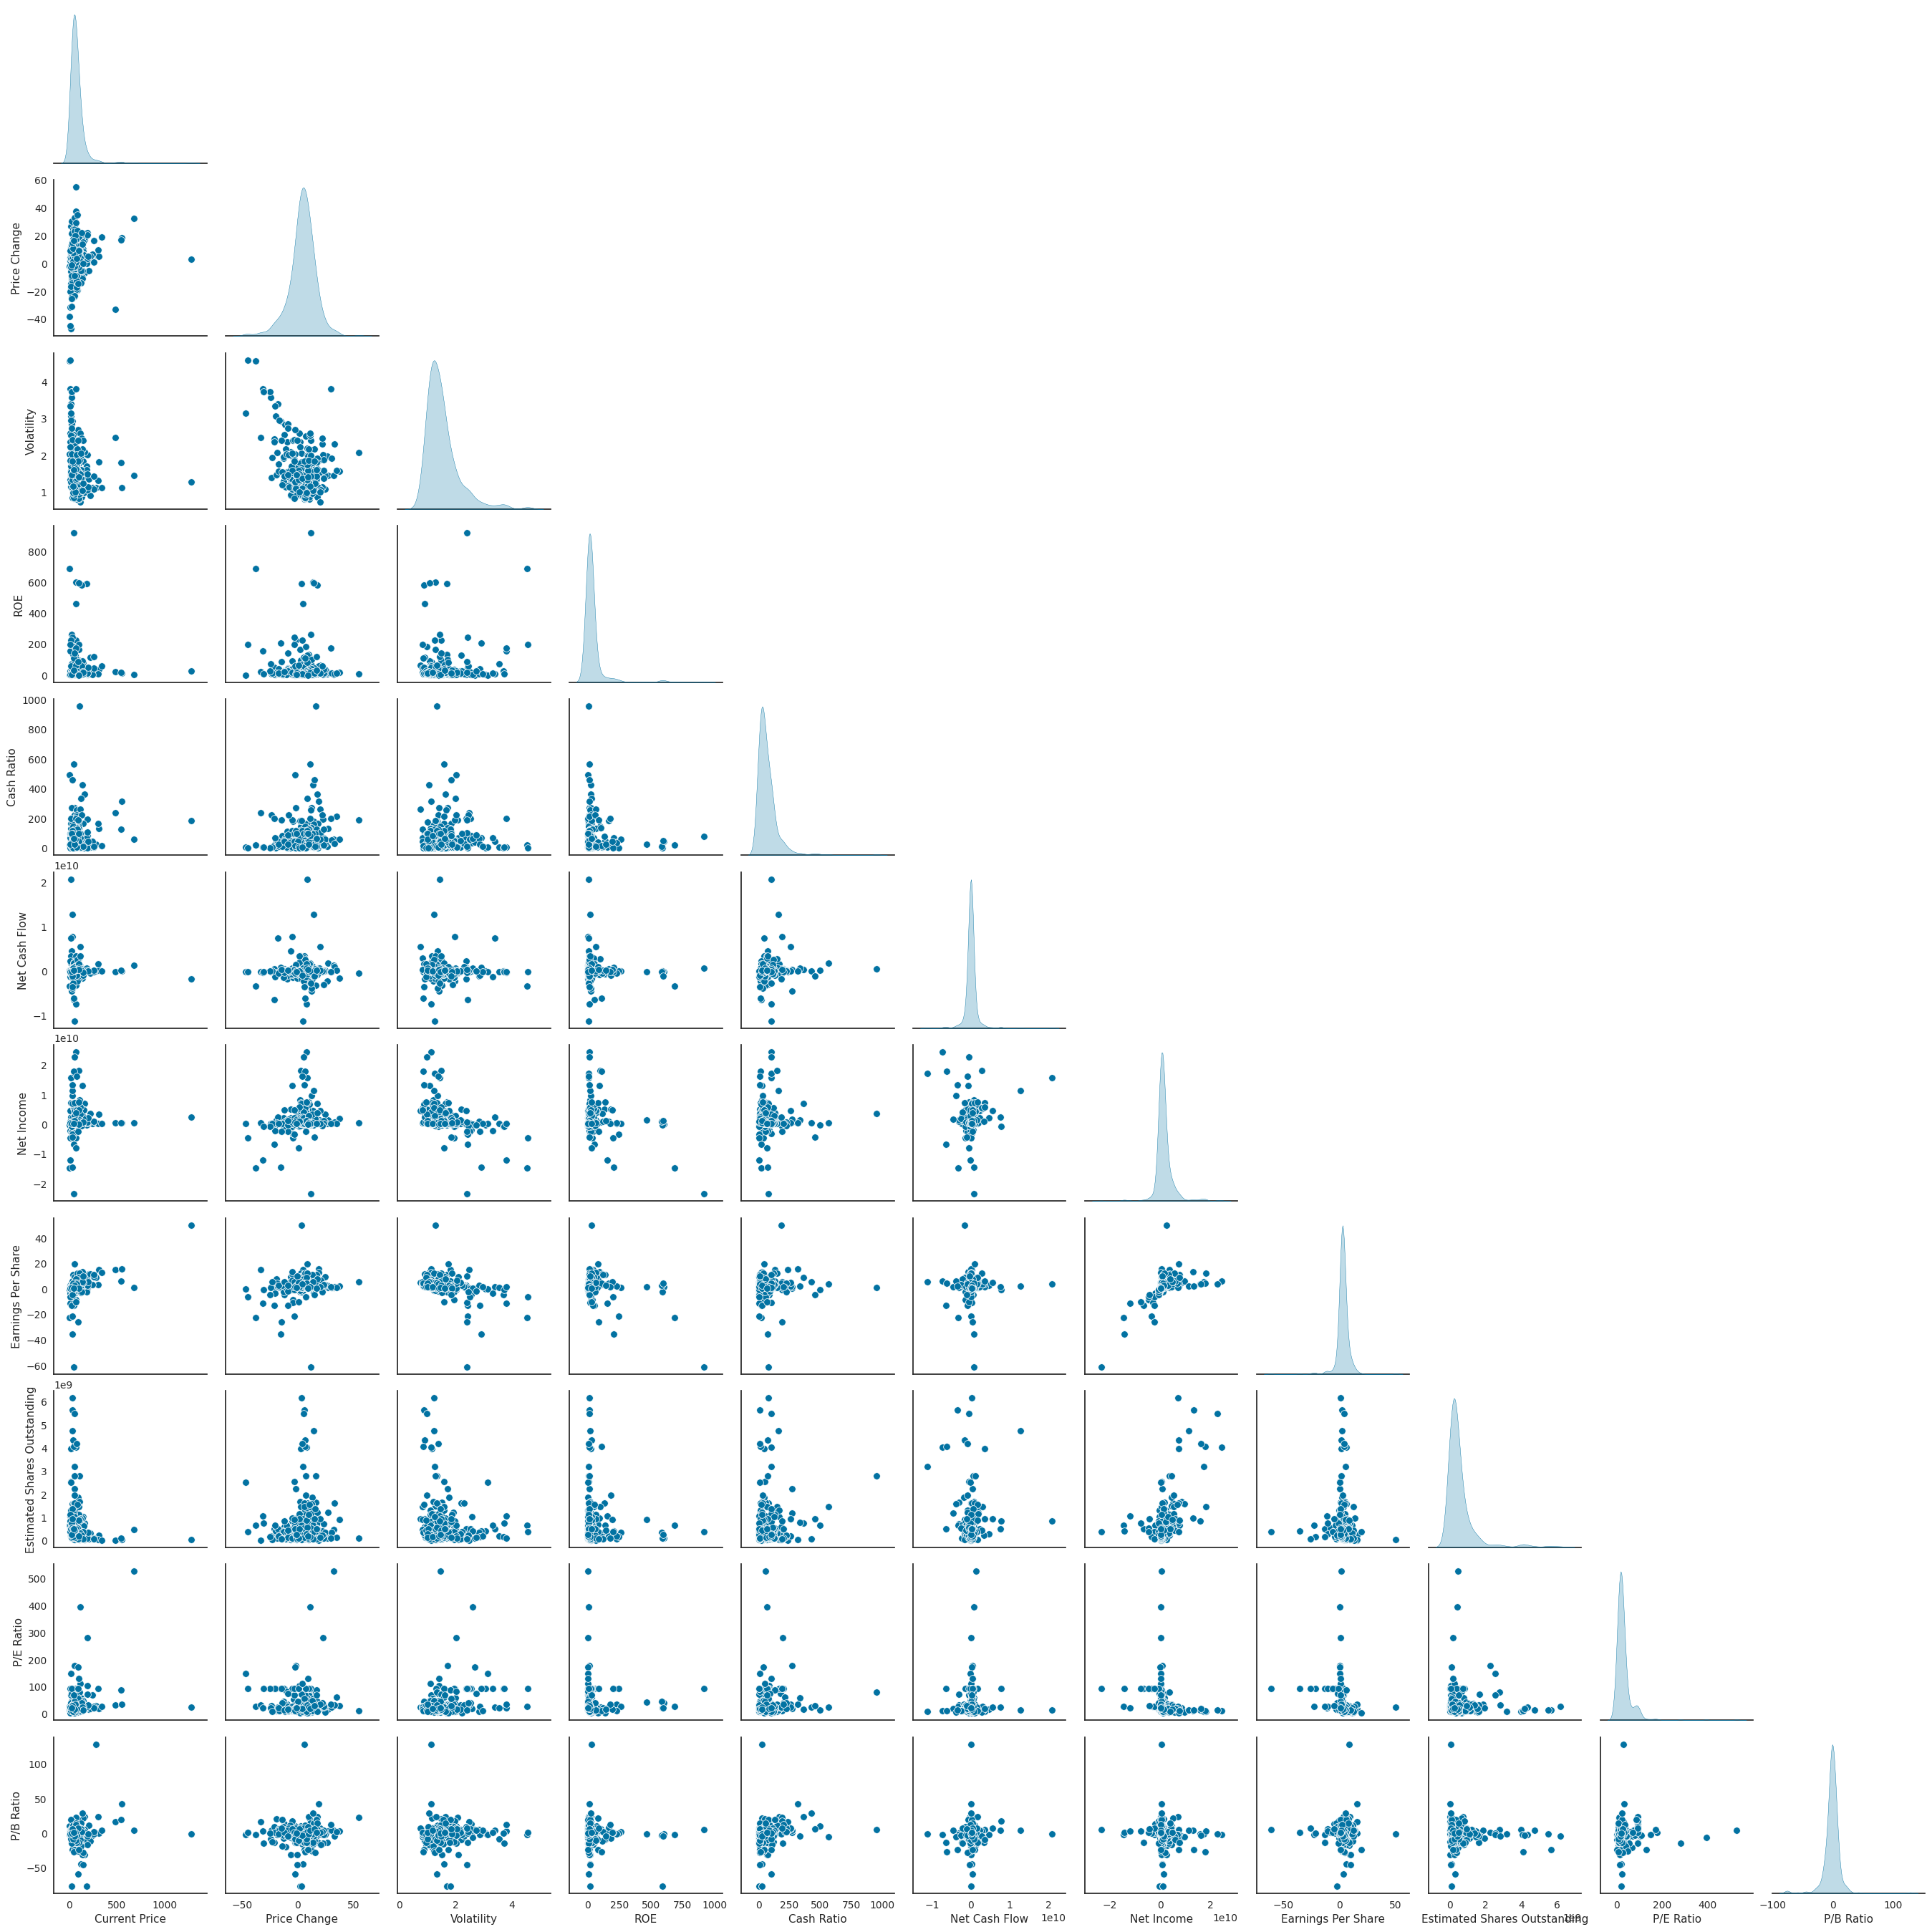

In [36]:
# Analyze using pairplot
plt.figure(figsize=(14,14))
sns.pairplot(df[num_fields], diag_kind='kde',corner=True);

**Observations**:

* Most variables follow a normal or near-normal distribution.

* Stock prices generally increase with higher Earnings Per Share.

* Price stability declines as Volatility increases.

* Firms with high Earnings Per Share may not always exhibit high ROE.

* Firms with higher Net Income tend to have more Estimated Shares Outstanding.

* Higher Net Income typically leads to higher Earnings Per Share

#### **Question 1**:  Are high priced stocks more volatile than low priced stocks ?

In [37]:
# lets print the correlation between current price and volatility
df[df['Current Price'] <=200][['Current Price','Volatility']].corr()

Current Price  Volatility
Current Price           1.00       -0.26
Volatility             -0.26        1.00

In [38]:
# lets print the correlation between current price and volatility
df[df['Current Price']  > 200][['Current Price','Volatility']].corr()

Current Price  Volatility
Current Price           1.00        0.14
Volatility              0.14        1.00

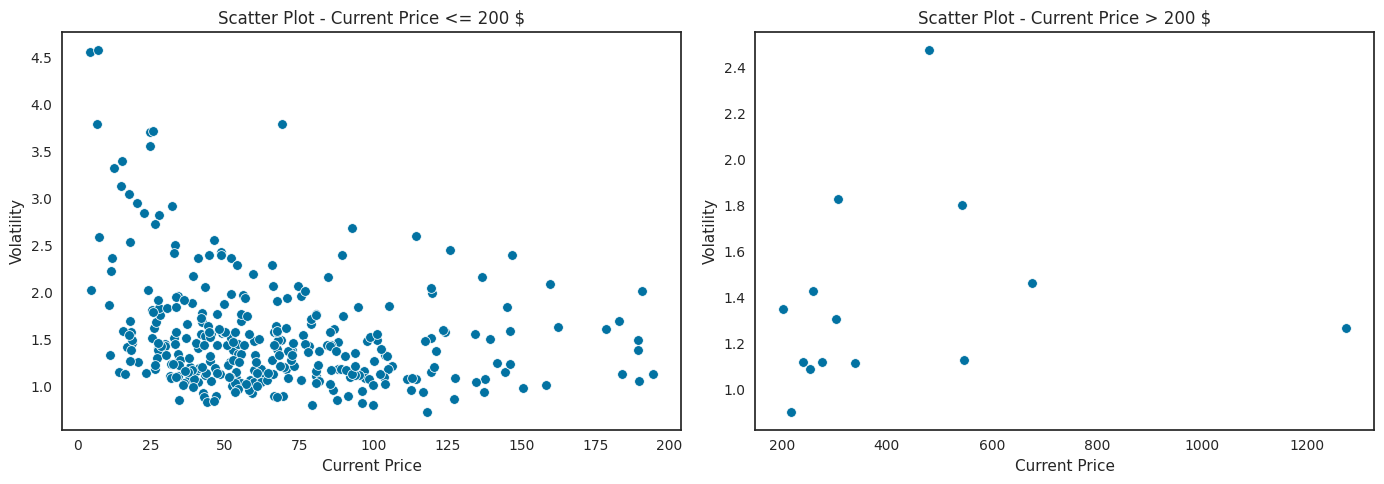

In [39]:
# Lets plot a scatter plot
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.title('Scatter Plot - Current Price <= 200 $')
sns.scatterplot(df[df['Current Price'] <= 200], x='Current Price', y='Volatility')

plt.subplot(1, 2, 2)
plt.title('Scatter Plot - Current Price > 200 $')
sns.scatterplot(df[df['Current Price'] > 200], x='Current Price', y='Volatility')

plt.tight_layout()
plt.show()

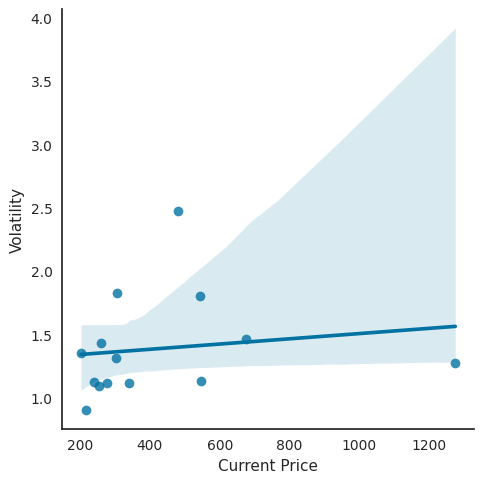

In [40]:
# Lets plot a  lmplot
sns.lmplot(df[df['Current Price'] >= 200], x='Current Price', y='Volatility');

**Observations**:

The plots indicate a weak negative correlation between Current Price and Volatility for lower-priced stocks (below 200), while higher-priced stocks exhibit a very weak positive correlation.

This suggests that higher-priced shares tend to be more volatile

#### **Question 2**: Do companies with higher ROE tend to have higher Net Income?

In [41]:
# Lets see the correlation between ROE and Net Income
df[['ROE', 'Net Income']].corr()

ROE  Net Income
ROE         1.00       -0.29
Net Income -0.29        1.00

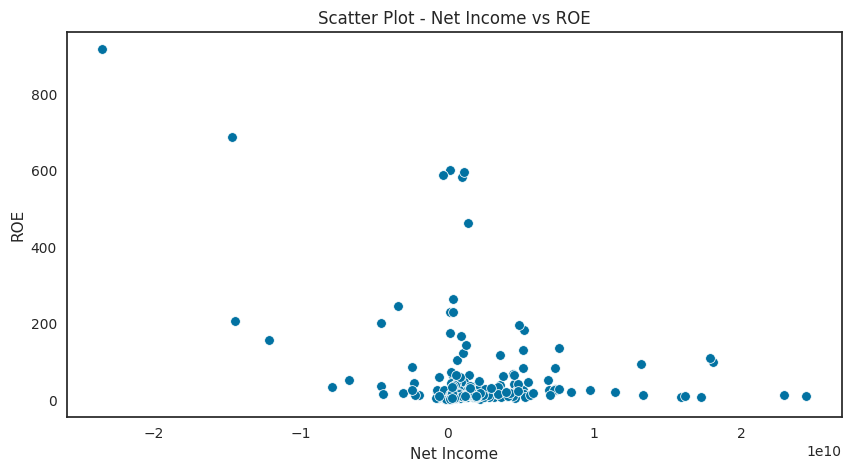

In [42]:
# plot scatter plot for Net Income vs ROE
plt.title('Scatter Plot - Net Income vs ROE')
sns.scatterplot(df,x='Net Income', y='ROE');

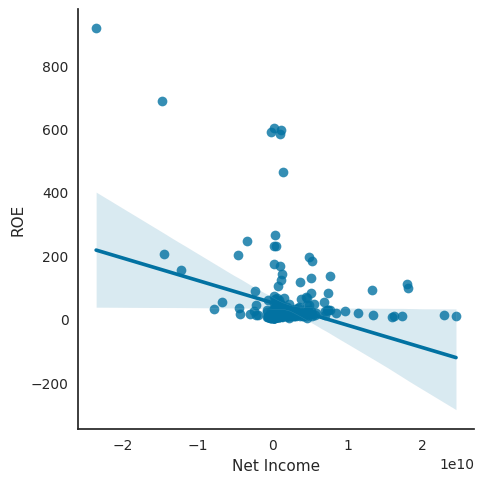

In [43]:
# Lets plot a scatter plot
sns.lmplot(df,x='Net Income', y='ROE');

**Observations**:

Surprisingly, the higher Net incomes tend to have lower ROE

#### **Question 3**: What are the top 5 stable stocks ?

In [44]:
# The stock is stable if the volatility is less
# sort the stocks by volatility in descending order
df.sort_values(by='Volatility').head()

Ticker Symbol               Security             GICS Sector  \
201           MCD       McDonald's Corp.  Consumer Discretionary   
245           PEP           PepsiCo Inc.        Consumer Staples   
248            PG       Procter & Gamble        Consumer Staples   
307           UPS  United Parcel Service             Industrials   
268           RSG  Republic Services Inc             Industrials   

            GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
201               Restaurants         118.14         19.94        0.73   64   
245               Soft Drinks          99.92          6.07        0.81   45   
248         Personal Products          79.41         10.66        0.81   17   
307   Air Freight & Logistics          96.23         -2.80        0.83  196   
268  Industrial Conglomerates          43.99          6.75        0.84   10   

     Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
201         260     5607600000  4529300000                4.82   
245          68     2962000000  5452000000                3.71   
248         129      160383000   636056000                3.28   
307          44      439000000  4844000000                5.38   
268           2      -42800000   749900000                2.14   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
201                  939688796.70      24.51       7.12  
245                 1469541779.00      26.93      -5.19  
248                  491391569.00      24.07      -2.26  
307                  900371747.20      17.89       1.07  
268                  350420560.70      20.56      -2.43

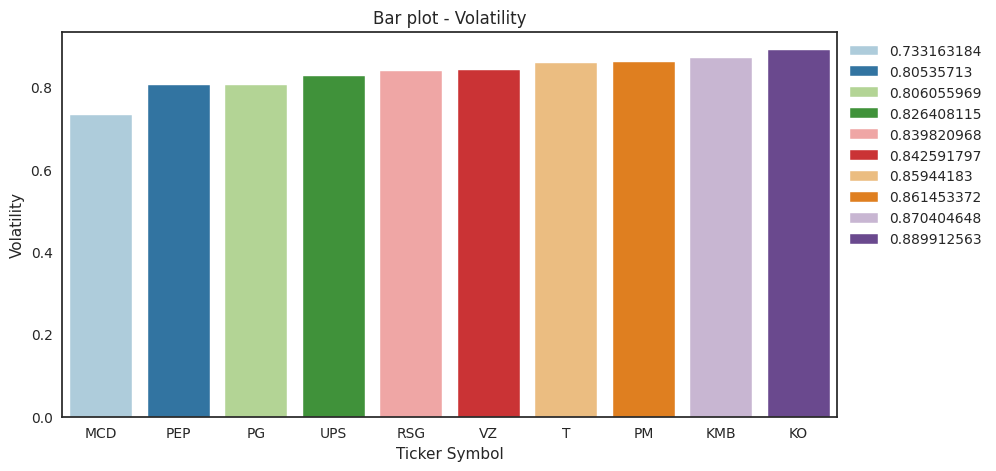

In [45]:
# bar plot for Ticket Symbol and Volatility
ax = sns.barplot(df.sort_values(by='Volatility').head(10), x='Ticker Symbol', y='Volatility', palette='Paired', hue='Volatility')
plt.title("Bar plot - Volatility")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**Observations**:

The firms that have stable stocks are

* MCD - Macdonalds Corp
* PEP - PepsiCo Inc
* PG - Procter & Gamble
* UPS - United Parcel Service
* RSG - Republic Services Inc

#### **Question 4**: Is there a strong relationship between Cash Ratio and Net Income?

In [46]:
# Lets see the correlation between Cash Ratio and Net Income
df[['Cash Ratio', 'Net Income']].corr()

Cash Ratio  Net Income
Cash Ratio        1.00        0.03
Net Income        0.03        1.00

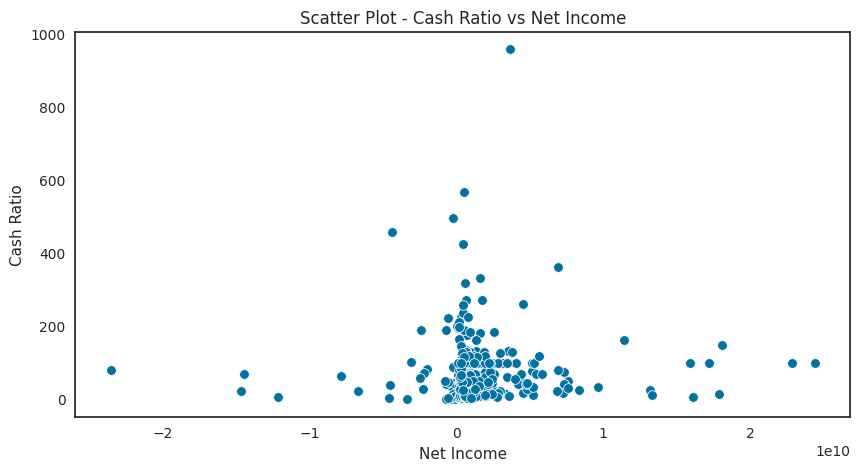

In [47]:
# plot scatter plot for Net Income vs ROE
plt.title('Scatter Plot - Cash Ratio vs Net Income')
sns.scatterplot(df,x='Net Income', y='Cash Ratio');

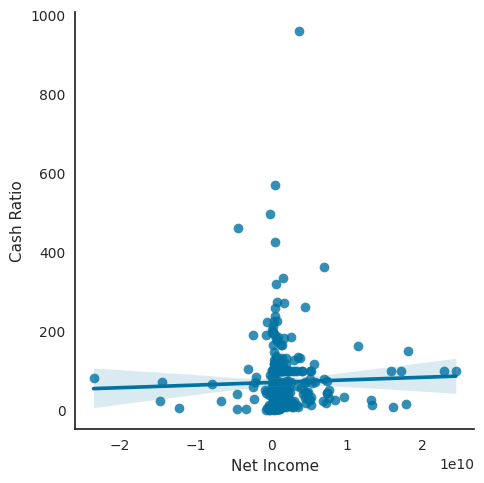

In [48]:
# Lets plot a lmplot
sns.lmplot(df,x='Net Income', y='Cash Ratio');

**Observations**:

* There is very weak postive correlation between Net Income and Cash Ratio

**Question 5**: How does the Net Income influence the Earnings Per Share

In [49]:
# Lets see the correlation between Cash Ratio and Net Income
df[['Earnings Per Share', 'Net Income']].corr()

Earnings Per Share  Net Income
Earnings Per Share                1.00        0.56
Net Income                        0.56        1.00

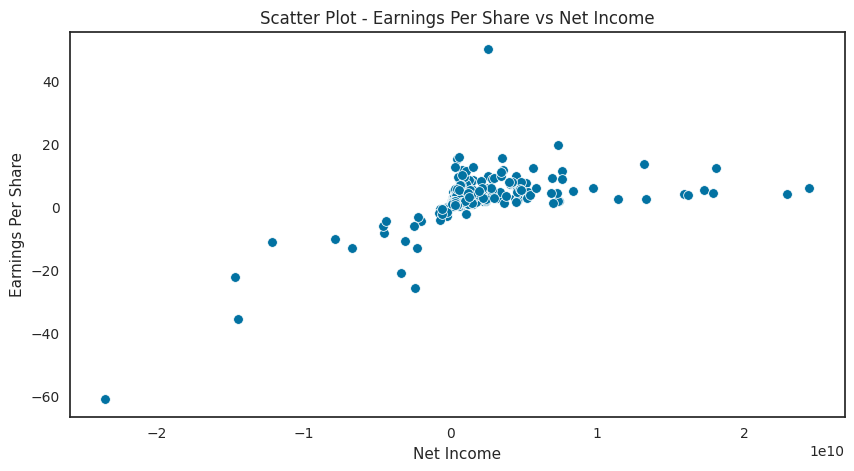

In [50]:
# plot scatter plot for Net Income vs Earnings Per Share
plt.title('Scatter Plot - Earnings Per Share vs Net Income')
sns.scatterplot(df,x='Net Income', y='Earnings Per Share');

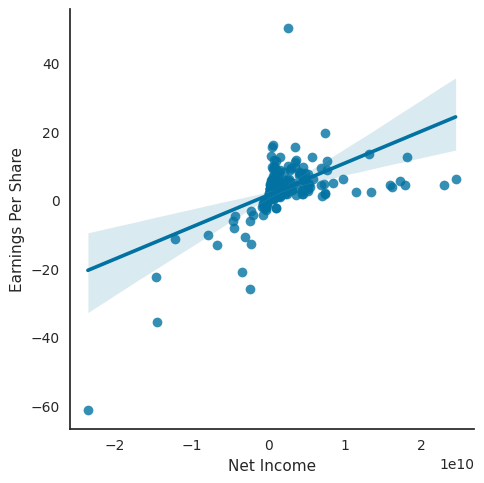

In [51]:
# Lets plot a lmplot
sns.lmplot(df,x='Net Income', y='Earnings Per Share');

**Observations**:

Higher Net Income firms would result higher Earnings Per Share

**Question 6**:  List down the stocks that have higher price variation. Are those stocks risky ?

In [52]:
# stocks that have high price drop
df.sort_values(by='Price Change').head()

Ticker Symbol                   Security             GICS Sector  \
180           KMI              Kinder Morgan                  Energy   
284           SWN        Southwestern Energy                  Energy   
62            CHK          Chesapeake Energy                  Energy   
70            CMG     Chipotle Mexican Grill  Consumer Discretionary   
127           FCX  Freeport-McMoran Cp & Gld               Materials   

                                   GICS Sub Industry  Current Price  \
180  Oil & Gas Refining & Marketing & Transportation          14.92   
284               Oil & Gas Exploration & Production           7.11   
62                              Integrated Oil & Gas           4.50   
70                                       Restaurants         479.85   
127                                           Copper           6.77   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
180        -47.13        3.14    1           7      -86000000    253000000   
284        -44.80        4.58  200           2      -38000000  -4556000000   
62         -38.10        4.56  687          22    -3283000000 -14685000000   
70         -33.13        2.47   22         237     -171460000    475602000   
127        -31.69        3.80  155           5     -240000000 -12156000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
180                0.10                 2530000000.00     149.20      -1.89  
284               -6.07                  402141680.40      93.09       1.27  
62               -22.43                  654703522.10      28.41      -1.84  
70                15.30                   31085098.04      31.36      17.20  
127              -11.31                 1074801061.00      22.81       2.94

* KMI, SWN, CHK have the most price drop
* Volatility is high for these firms

In [53]:
df.sort_values(by='Price Change', ascending=False).head()

Ticker Symbol         Security             GICS Sector  \
136          FSLR  First Solar Inc  Information Technology   
87             DD   Du Pont (E.I.)               Materials   
293          TRIP      TripAdvisor  Consumer Discretionary   
220           MYL       Mylan N.V.             Health Care   
26           AMZN   Amazon.com Inc  Consumer Discretionary   

                      GICS Sub Industry  Current Price  Price Change  \
136                      Semiconductors          65.99         55.05   
87                Diversified Chemicals          66.60         37.49   
293  Internet & Direct Marketing Retail          85.25         34.80   
220                     Pharmaceuticals          54.07         33.18   
26   Internet & Direct Marketing Retail         675.89         32.27   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
136        2.08   10         190     -355228000   546421000   
87         1.58   20          60    -1610000000  1953000000   
293        1.58   14         212      159000000   198000000   
220        2.30    9          30     1010500000   847600000   
26         1.46    4          58     1333000000   596000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
136                5.42                  100815682.70      12.18      22.56  
87                 2.17                  900000000.00      30.69       3.25  
293                1.38                  143478260.90      61.78       2.63  
220                1.58                 1633015873.00      33.43      -4.21  
26                 1.28                  465625000.00     528.04       3.90

* FSLR, DD, TRIP have the most price increase
* These firms have higher Volatility.

In [54]:
# Lets analyze with absolute price change
df['Abs Price Change'] = df['Price Change'].abs()

In [55]:
# Correlation between Absolute price change and Volatility
df[['Abs Price Change','Volatility']].corr()

Abs Price Change  Volatility
Abs Price Change              1.00        0.46
Volatility                    0.46        1.00

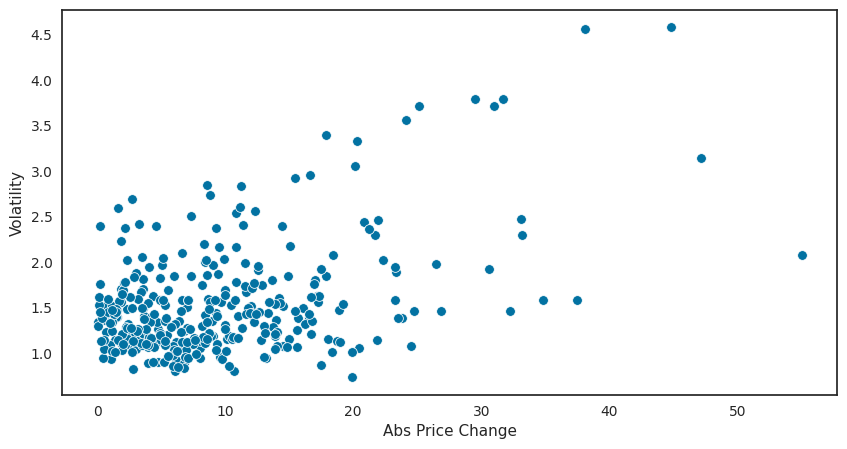

In [56]:
# plot the scatter plot
sns.scatterplot(df,x='Abs Price Change', y='Volatility');

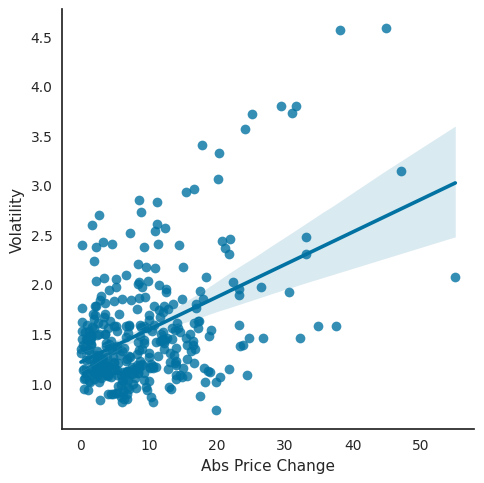

In [57]:
# plot the lmplot
sns.lmplot(df,x='Abs Price Change', y='Volatility');

In [58]:
# drop the new column created
df.drop('Abs Price Change', axis=1, inplace=True)

**Observations**:

* An increase in price change is associated with higher volatility.
* Riskier stocks tend to experience either significant price drops or sharp increases.

### Insights based on EDA

* Most variables follow a normal or near-normal distribution.

* Stock prices generally increase with higher Earnings Per Share.

* Higher-priced shares tend to be more volatile.

* Firms with high Earnings Per Share may not always exhibit high ROE.

* Firms with higher Net Income tend to have more Estimated Shares Outstanding.

* Higher Net Income typically leads to higher Earnings Per Share.

* Stock price is moderately influenced by earnings and valuation ratios

* Larger companies tend to have stronger earnings, benefiting EPS and valuation.



## Data Preprocessing

### Handle Outliers

In [59]:
# functions to treat outliers by flooring and capping
def treat_outliers_feature(data, feature):
    """
    Treats outliers in a variable

    data: dataframe
    feature: dataframe column
    """
    Q1 = data[feature].quantile(0.25)  # 25th quantile
    Q3 = data[feature].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[feature] = np.clip(data[feature], Lower_Whisker, Upper_Whisker)

    return data

In [60]:
def treat_outliers(data, feature_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in feature_list:
        data = treat_outliers_feature(data, c)

    return data

In [61]:
# Function to plot the outliers
def visualize_box_plots(data):
  plt.figure(figsize=(14,10))
  for i,feature in enumerate(data.select_dtypes(include='number')):
    plt.subplot(3,4,i+1)
    plt.title(f"Box Plot - {feature}")
    sns.boxplot(data, y=feature)

  plt.tight_layout()
  plt.show()

In [62]:
# Function to plot the distributions
def visualize_hist_plots(data):
  plt.figure(figsize=(14,7))
  for i,feature in enumerate(data.select_dtypes(include='number')):
    plt.subplot(3,4,i+1)
    plt.title(f"Hist Plot - {feature}")
    sns.histplot(data, x=feature, kde=True)

  plt.tight_layout()
  plt.show()

In [63]:
# Lets copy the numerical fields to X
X = df[num_fields].copy()

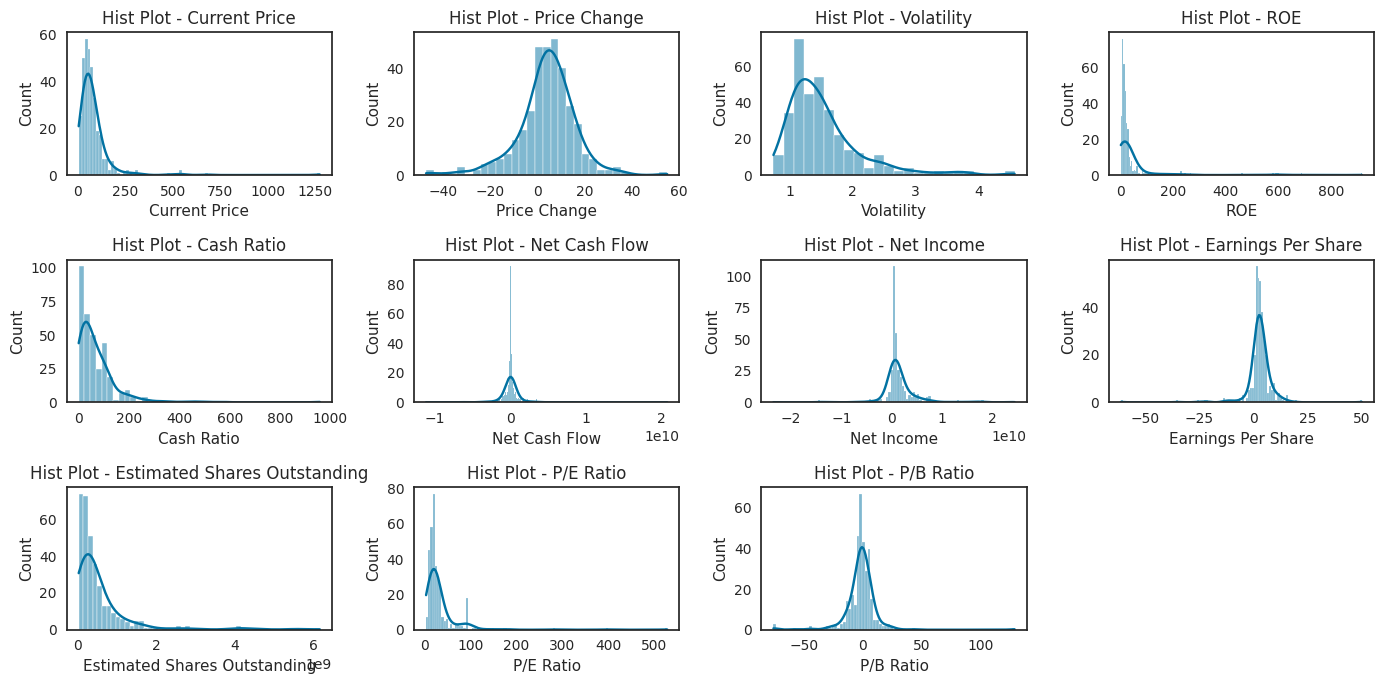

In [64]:
# visualize the distributions
visualize_hist_plots(X)

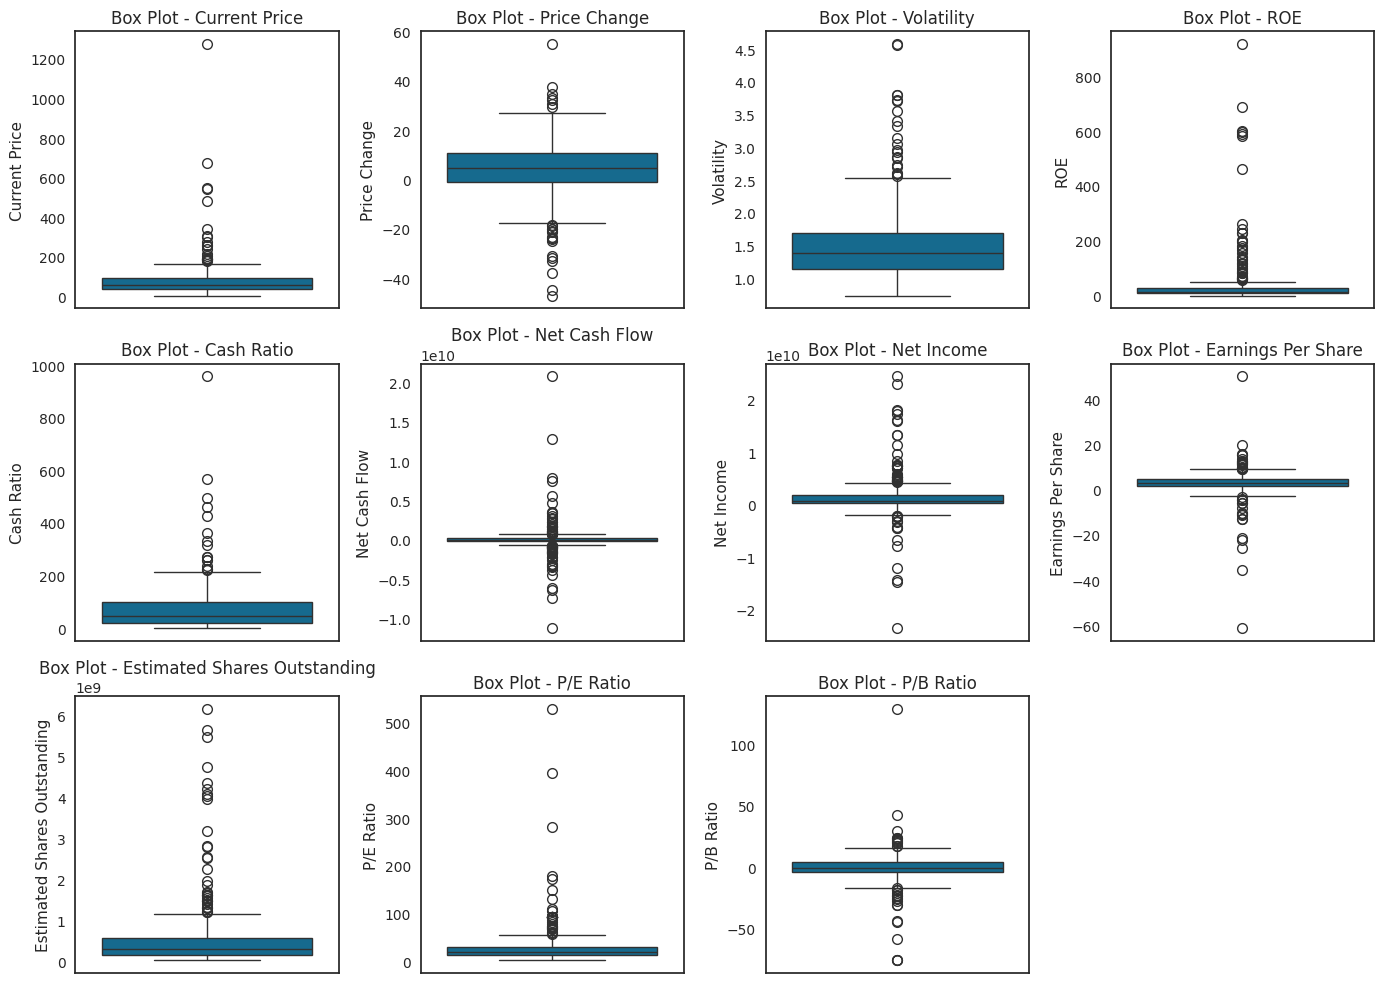

In [65]:
# visualize the outliers
visualize_box_plots(X)

**Observations**:

* Outliers are observed in most of the features.
* While these outliers appear to be genuine, they are handled to enhance the performance of distance-based clustering models.

In [66]:
# Handle outliers by clipping the values to min and max
df = treat_outliers(X, num_fields)

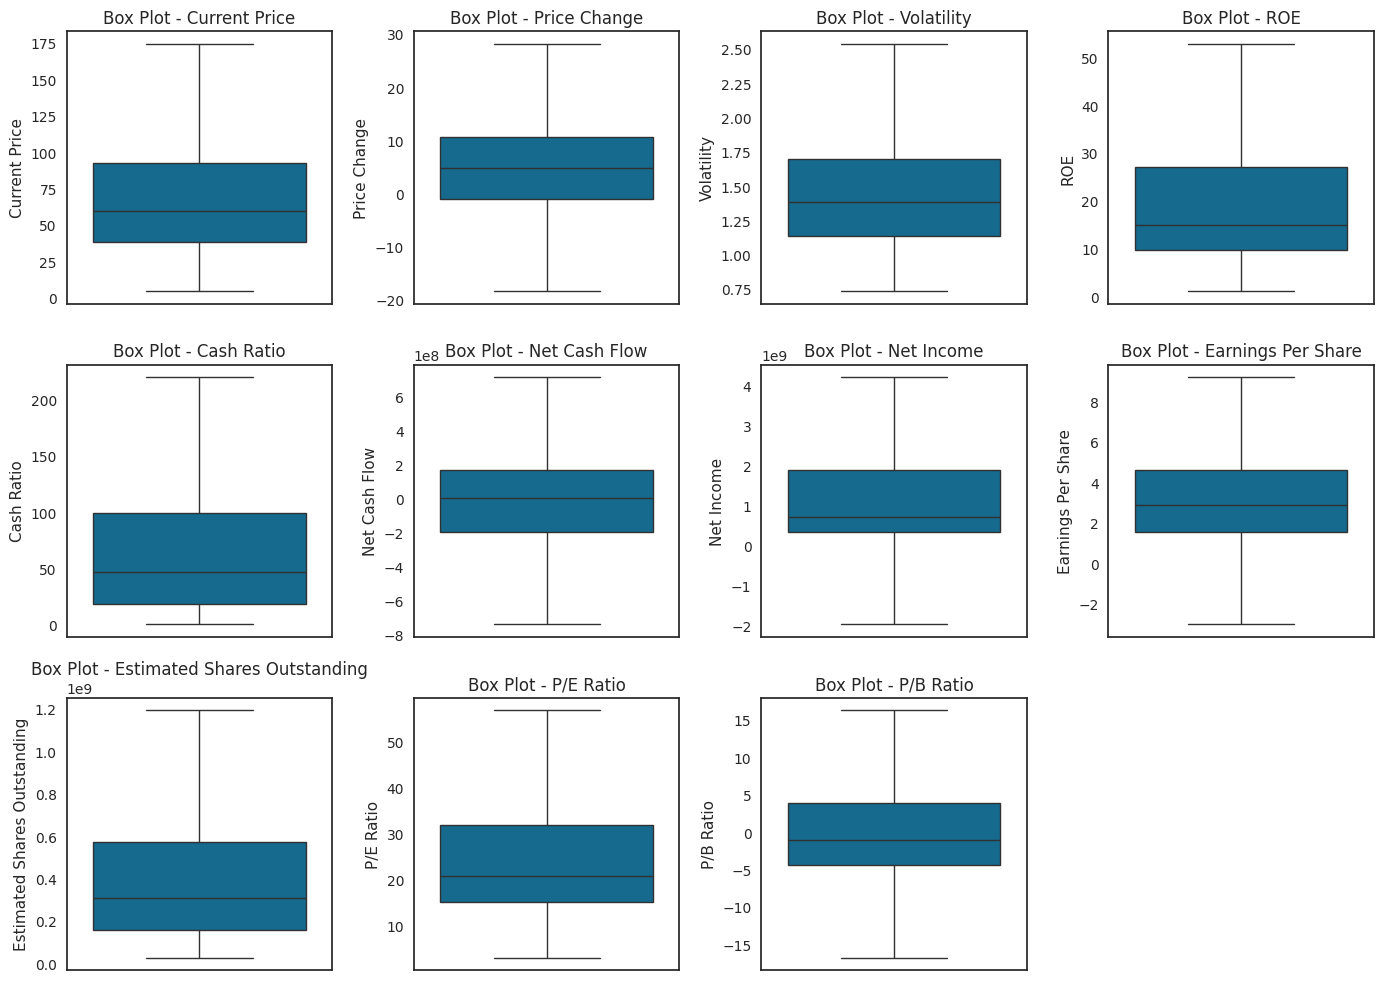

In [67]:
# visualize after the outliers are treated
visualize_box_plots(X)

### Scaling the dataset

In [68]:
# scale the data to standard scaling
scaler = StandardScaler()
X_d = scaler.fit_transform(X)
X = pd.DataFrame(X_d , columns = X.columns)
X.head()

Current Price  Price Change  Volatility   ROE  Cash Ratio  Net Cash Flow  \
0          -0.65          0.55        0.45  2.12       -0.21          -1.43   
1          -0.26          0.39        1.57  2.12        0.24           0.13   
2          -0.59          0.68       -0.46  0.03        0.07           1.72   
3           0.55          0.94       -0.27 -0.75        2.01          -0.57   
4          -0.35         -0.60        0.48 -0.43        2.70           0.76   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0        1.98                2.11                          0.65      -1.49   
1        1.98                0.02                          2.12      -0.46   
2        1.98               -0.05                          2.12      -0.70   
3       -0.37               -0.64                          0.17       2.14   
4       -0.33               -0.96                          2.12       2.14   

   P/B Ratio  
0      -1.00  
1      -0.99  
2       0.11  
3       0.71  
4       0.30

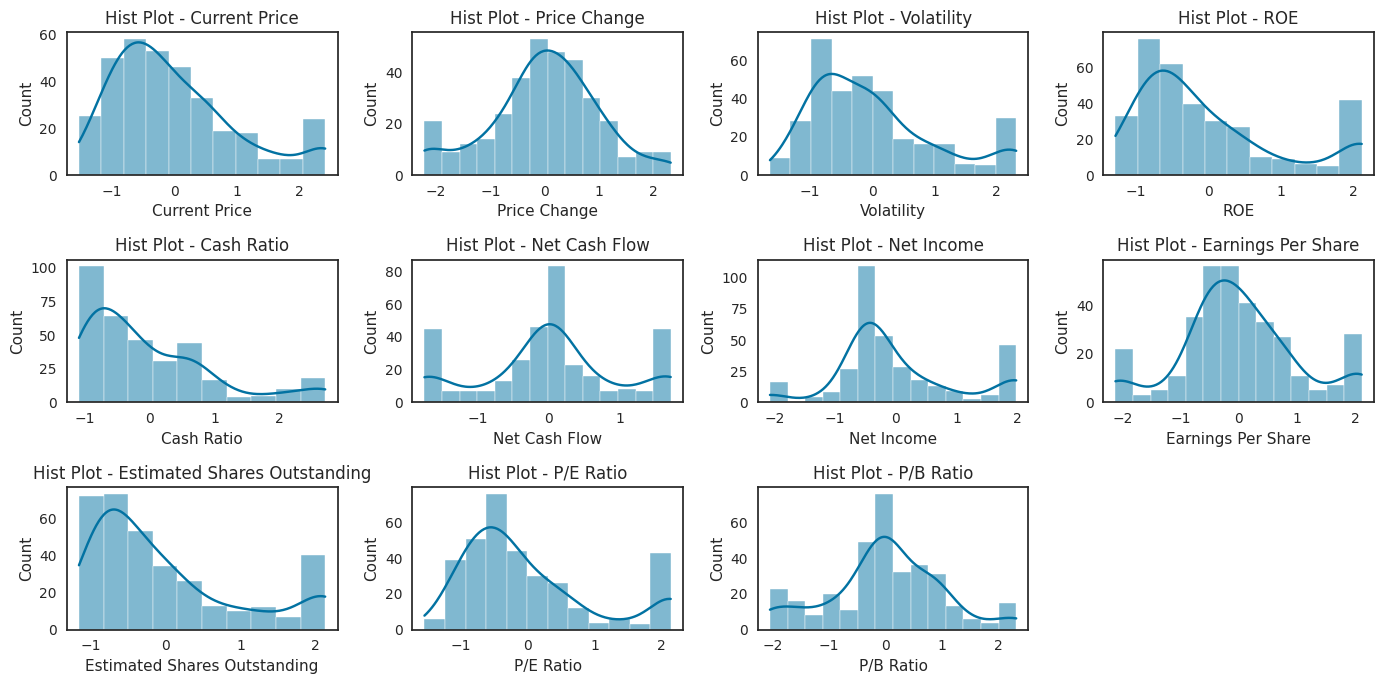

In [69]:
# visualize the data after scaling
visualize_hist_plots(X)

**Observations**

The shape of the distributions is retained after the scaling.

## K-Means Clustering

In [70]:
# define range of clusters
clusters = range(2,10)

# list to store the mean distortions
meanDistortions = []

# copy the scaled features
X_kc = X.copy()

In [71]:
# create the model for each cluster and compute mean distortions
for k in clusters:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_kc)
  prediction = model.predict(X_kc)
  distortion  = sum(np.min(cdist(X_kc, model.cluster_centers_, "euclidean"),axis=1)) / X_kc.shape[0]
  meanDistortions.append(distortion)
  print(f"Number of Clusters: {k} => Distortion: {distortion} ")

Number of Clusters: 2 => Distortion: 2.95288825767062 
Number of Clusters: 3 => Distortion: 2.7587853682733146 
Number of Clusters: 4 => Distortion: 2.6555258457975297 
Number of Clusters: 5 => Distortion: 2.5384748268248507 
Number of Clusters: 6 => Distortion: 2.474155236764844 
Number of Clusters: 7 => Distortion: 2.411393618905991 
Number of Clusters: 8 => Distortion: 2.3594206746055497 
Number of Clusters: 9 => Distortion: 2.3188140740735563 


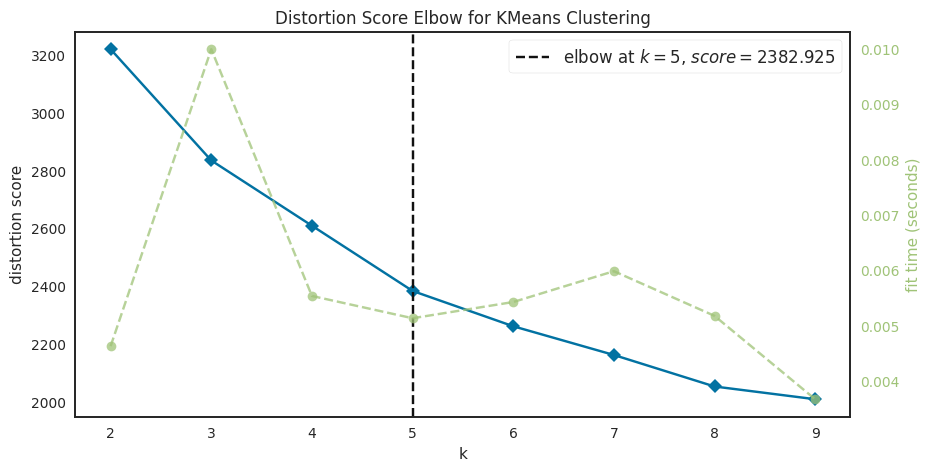

In [72]:
# plot the elbow curve using yellowbricks
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,10))
visualizer.fit(X_kc)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

**Observations**:

The optimal k-value, as indicated by the elbow curve, appears to be 5

In [73]:
# Lets find the K-value using silhouette score
sil_score = []
for k in range(2,10):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  predictions = model.predict(X_kc)
  score = silhouette_score(X_kc, predictions)
  print(f"Number of Clusters: {k} => Sil Score: {score} ")
  sil_score.append(score)

Number of Clusters: 2 => Sil Score: 0.15778013037317976 
Number of Clusters: 3 => Sil Score: 0.18282709918315626 
Number of Clusters: 4 => Sil Score: 0.17351147196993166 
Number of Clusters: 5 => Sil Score: 0.16242303008218809 
Number of Clusters: 6 => Sil Score: 0.1345857096596249 
Number of Clusters: 7 => Sil Score: 0.11349975964863085 
Number of Clusters: 8 => Sil Score: 0.14574551513994494 
Number of Clusters: 9 => Sil Score: 0.11620537877999854 


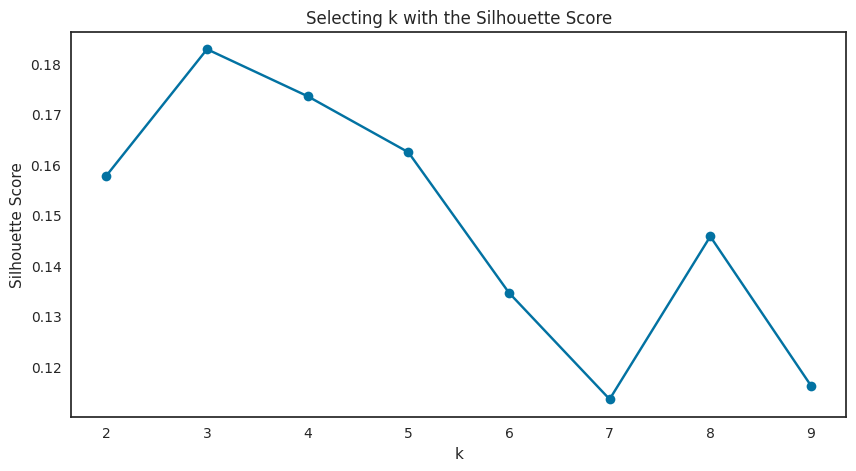

In [74]:
# plot the silhouette curve to find the optimal K value
plt.plot(clusters, sil_score, "o-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with the Silhouette Score")
plt.show()

**Observations**:

From Silhoueete score, k=3 seems to be the optimal value.

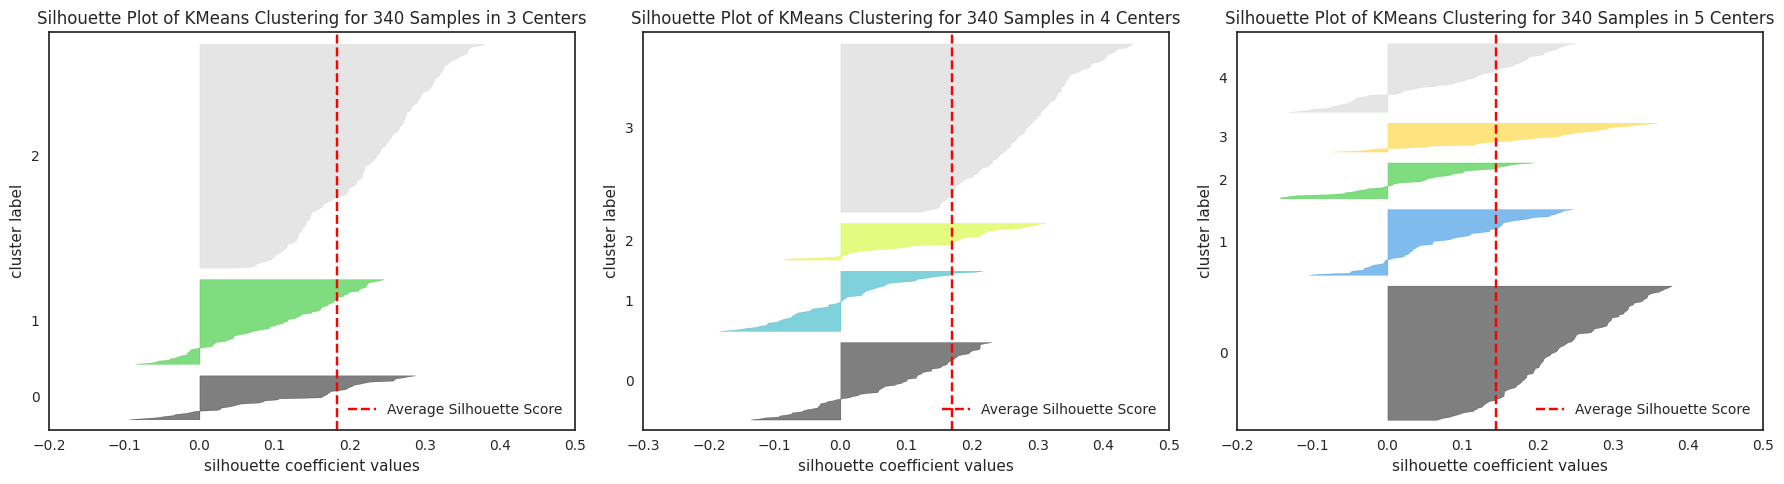

In [75]:
# plot the silhouette coefficients and conclude the optimal k-value
clusters_list = [3, 4, 5]

# Create subplots
fig, axes = plt.subplots(1, len(clusters_list), figsize=(18, 5))

for idx, n_clusters in enumerate(clusters_list):
    ax = axes[idx]  # Select subplot axis

    # Apply KMeans clustering
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    # Use Yellowbrick's SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(model, ax=ax, colors="nipy_spectral")
    visualizer.fit(X_kc)
    visualizer.finalize()

plt.tight_layout()
plt.show()

**Observations**:

* Misclassifications are present across all cluster configurations (k=3, k=4, and k=5), but they appear to be minimal for k=3.

* The average Silhouette score is highest when using 3 clusters

* k=4 is the preferred choice for K-Means clustering that defines better defined groups.

### Final Model in K-Means

Based on elbow curve and sihouette coefficients analysis four clusters are preferred.

In [76]:
# create model with 4 clusters
start_time_k = time.time()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_kc)
end_time_k = time.time() - start_time_k
kmeans

KMeans(n_clusters=4, n_init=10, random_state=42)

In [77]:
print(f"The computation time for K Means with 4 clusters: {end_time_k}")

The computation time for K Means with 4 clusters: 0.025537490844726562


In [78]:
# add K-Means cluster labels
df['K Means Segments'] = kmeans.labels_
X_kc['K Means Segments'] = kmeans.labels_
df['K Means Segments'].value_counts()

K Means Segments
3    166
0     77
1     60
2     37
Name: count, dtype: int64

### K-Means Cluster profiling

In [79]:
# form the cluster profile with mean values for each segment
kmeans_cluster_profile = df.groupby('K Means Segments').mean()
kmeans_cluster_profile['Count in K Means Segments'] = df.groupby('K Means Segments')['Current Price'].count().values

# Highlight Max value
kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [80]:
# Highlight Min value
kmeans_cluster_profile.style.highlight_min(color="lightyellow", axis=0)

**Observations**:

* Cluster 0: Highly volatile stocks with high P/E ratio and a strong price decline.

* Cluster 1: Stocks with high price change, high cash ratio, high net cash flow, and high P/B ratio.

* Cluster 2: Stocks with strong profitability metrics such as high ROE, Earnings Per Share, Net Income, and Estimated Shares Outstanding.

* Cluster 3: The largest group with moderate financial metrics, potentially representing underperforming stocks.

In [81]:
# Function to visualize cluster groups with box plots
def cluster_box_plots(cluster):
  plt.figure(figsize=(15, 10))
  plt.suptitle("Boxplot of numerical variables for each cluster")

  for i, variable in enumerate(num_fields):
      plt.subplot(3, 4, i + 1)
      sns.boxplot(data=df, x=cluster, y=variable, showmeans=True,
                  meanprops={"markerfacecolor": "green", "markeredgecolor": "black"})

  plt.tight_layout(pad=2.0)

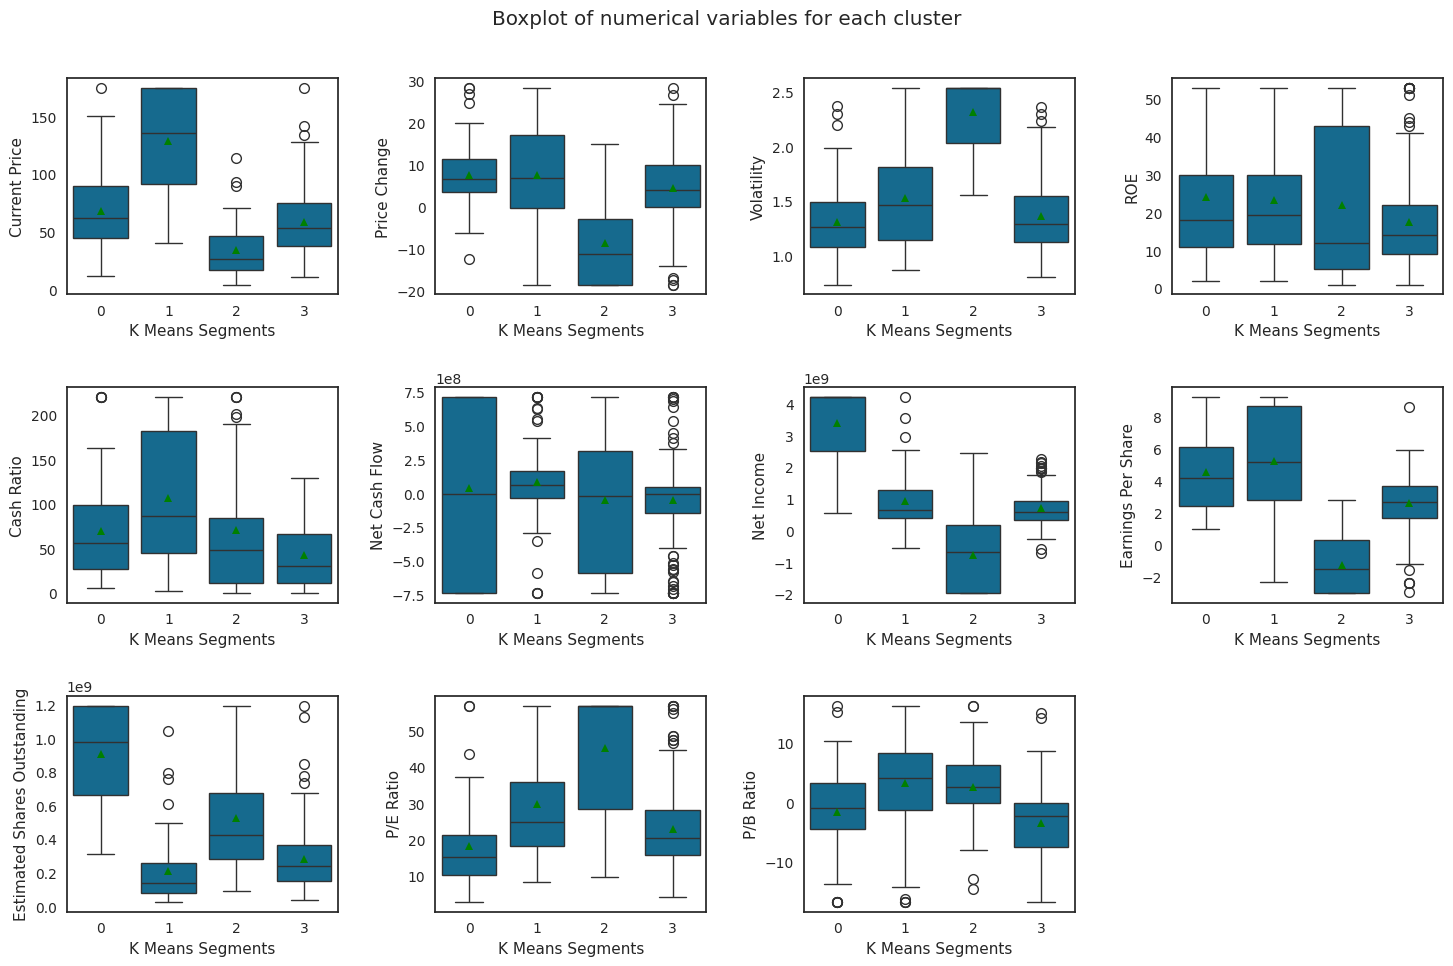

In [82]:
cluster_box_plots("K Means Segments")

**Observations**:

* Significant feature overlap exists among different cluster groups, indicating shared characteristics.
* The average Current Price is highest in Cluster 0 and lowest in Cluster 2.
* The average Price Change is highest in Cluster 1 and lowest in Cluster 2.
* The average Volatility is highest in Cluster 2 and lowest in Cluster 0.
* ROE is strong in Clusters 0 and 1 but low in Cluster 2.
* The average Cash Ratio is highest in Cluster 1 and lowest in Cluster 3.
* The mean Net Cash Flow is highest in Cluster 1 and lowest in Cluster 2.
* The mean Net Income is highest in Cluster 0 and lowest in Cluster 2.
* The average Earnings Per Share is highest in Cluster 1 and lowest in Cluster 2.
* The average Estimated Shares Outstanding is highest in Cluster 0 and lowest in Cluster 1.
* The mean P/E Ratio is highest in Cluster 2 and lowest in Cluster 0.
* The mean P/B Ratio is highest in Cluster 1 and negative in Cluster 3.

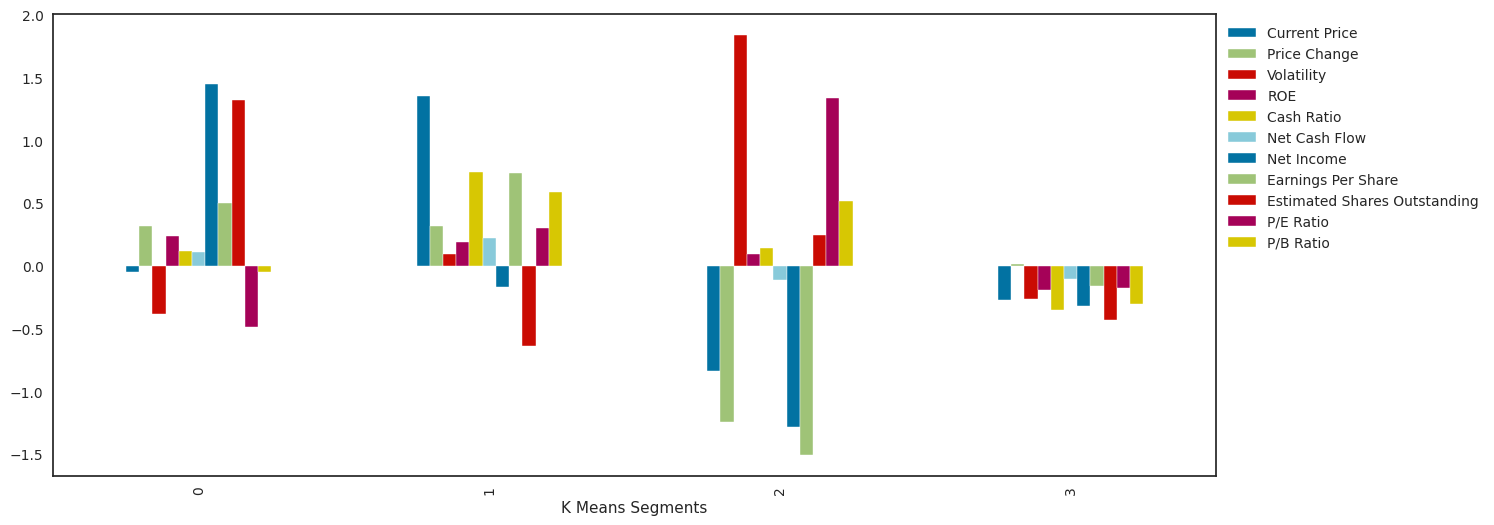

In [83]:
# Analyze the cluster groups with help of barcharts on scaled data
X_kc.groupby("K Means Segments").mean().plot.bar(figsize=(15, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

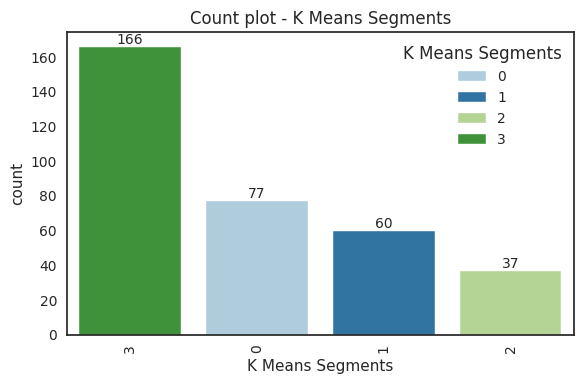

In [84]:
# lets plot the counts in each segment
labelled_barplot(df, ['K Means Segments'] ,cols=1, figsize=(6,4))

**Observations**:



**Cluster 0**:

* Stable and profitable stocks with decent price growth
* Low volatility makes them less risky
* Negative P/E and P/B ratios might indicate undervaluation

**Cluster 1**:

* High-liquidity stocks with stable prices
* High stock price but weak profitability
* Moderate earnings performance


**Cluster 2**:

* Highly volatile stocks with severe losses
* Negative earnings, low profitability
* High P/E Ratio suggests growth potential

**Cluster 3**:

* Largest cluster likely representing the market behavior.
* Weak profitability, liquidity concerns
* Minimal stock movement, potential stagnation
* Low investor confidence (negative P/E, P/B ratios)

## Hierarchical Clustering

### Check cophentic correlations

In [85]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward","centroid"]

# copy input features
X_hc = X.copy()

high_cophenet_corr = 0
high_dm_lm = [0,0]
dm_list = []
lm_list = []
cop_list = []

for dm in distance_metrics:
  for lm in linkage_methods:
    if ((lm == "ward" or lm =="centroid") and dm !="euclidean"):
      continue
    Z = linkage(X_hc, metric=dm, method=lm)
    c, c_dist = cophenet(Z, pdist(X_hc))
    dm_list.append(dm)
    lm_list.append(lm)
    cop_list.append(format(c,'.3f'))
    #print(f"Cophenetic correlation for {dm.capitalize()} distance and {lm.capitalize()} linkage => {c}")
    if c > high_cophenet_corr:
      high_cophenet_corr = c
      high_dm_lm[0] = dm
      high_dm_lm[1] = lm

df_cop = pd.DataFrame( {
    'Distance Metric' : dm_list,
    'Linkage Method' : lm_list,
    'Cophenetic Correlation' : cop_list
})

df_cop = df_cop.sort_values(by='Cophenetic Correlation',ascending=False)
df_cop.reset_index(drop=True)

Distance Metric Linkage Method Cophenetic Correlation
0        euclidean        average                  0.733
1        euclidean       centroid                  0.729
2        cityblock        average                  0.728
3        chebyshev         single                  0.721
4        chebyshev        average                  0.701
5        euclidean         single                  0.693
6        euclidean       weighted                  0.650
7        cityblock         single                  0.643
8      mahalanobis        average                  0.642
9      mahalanobis         single                  0.618
10       euclidean       complete                  0.615
11       cityblock       weighted                  0.608
12       euclidean           ward                  0.575
13     mahalanobis       weighted                  0.543
14       cityblock       complete                  0.533
15       chebyshev       weighted                  0.503
16     mahalanobis       complete                  0.385
17       chebyshev       complete                  0.368

**Observations**:

* The average linking method with euclidean distance metric is having highest Cophenetic correlation followed by centroid. (**0.732**)

* The complete linking method with chebyshev distance metric is having the least Cophenetic correlation.

* The ward linking method is having moderate Cophenetic correlation.


### Denodgrams

Lets explore the Dendograms for various linkage methods using Euclidean distance

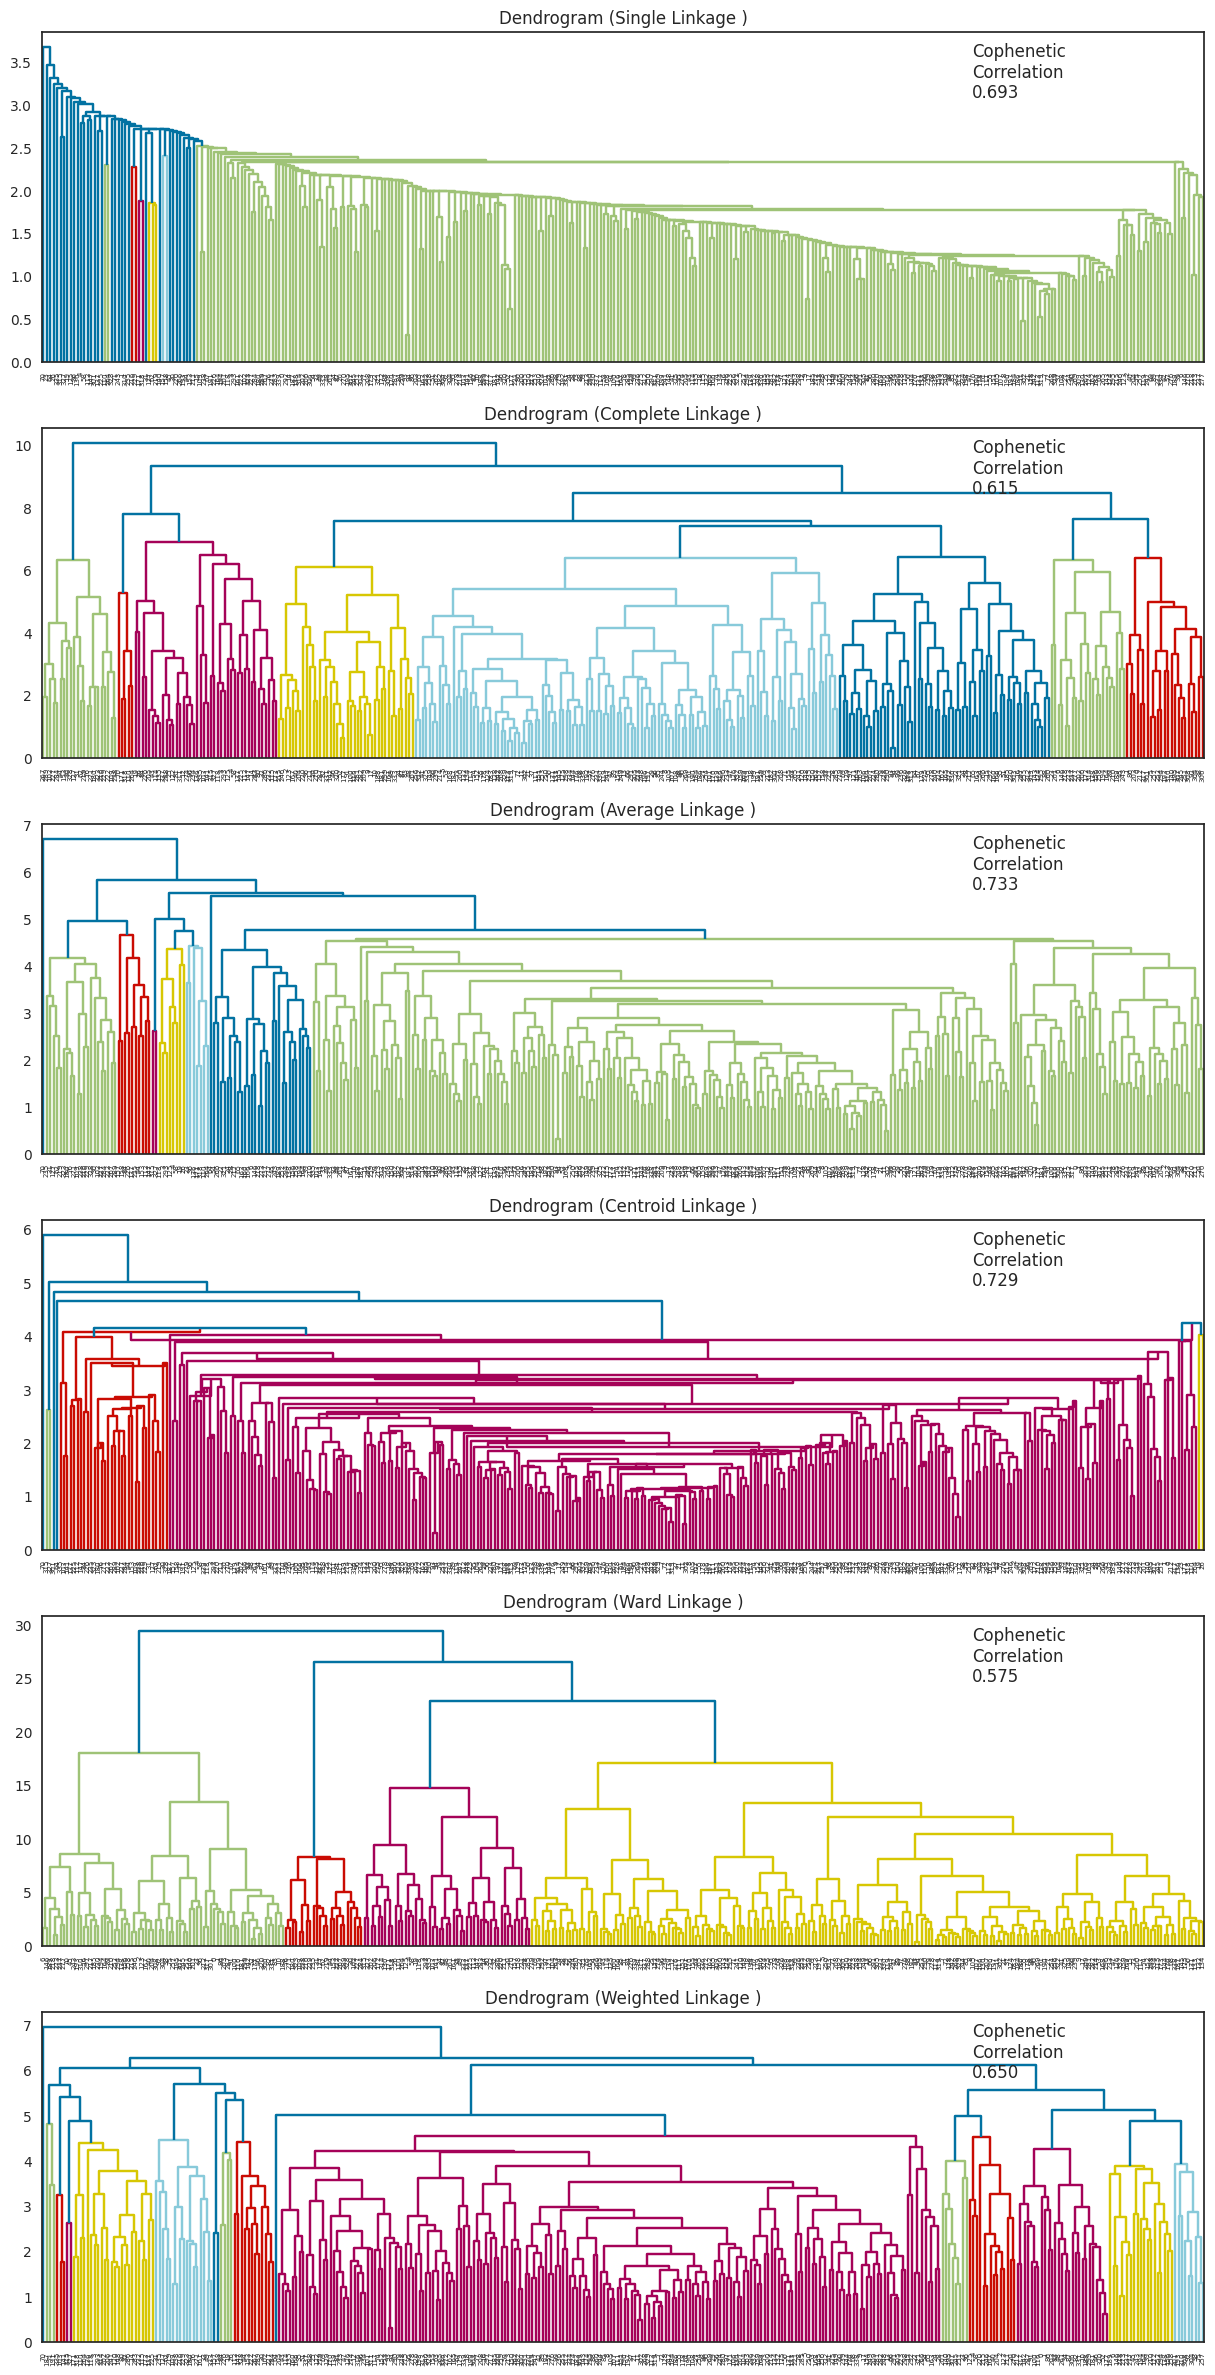

In [86]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
#compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(X_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage )")

    coph_corr, coph_dist = cophenet(Z, pdist(X_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.3f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**:

* The average (0.733) and centroid (0.729) linkage exhibiting higher Cophenetic correlation but the clusters are not clear.

* The weighted (0.650) and complete(0.615) linkage methods have good Cophenetic correlations and also effectively identify clear cluster structures

* The Ward linkage method (0.575), with a moderate Cophentic correlation, effectively defines distinct clusters, making it a suitable choice for this analysis

### Analyze with Elbow curve

Lets analyze the ideal number of clusters using KElbowVisualizer

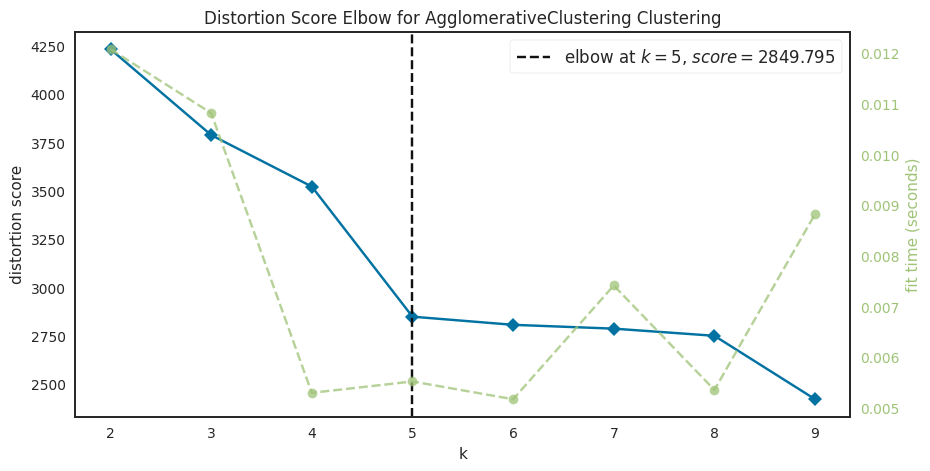

In [87]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(AgglomerativeClustering(metric='euclidean',linkage='average'),k=(2,10))

visualizer.fit(X_kc)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

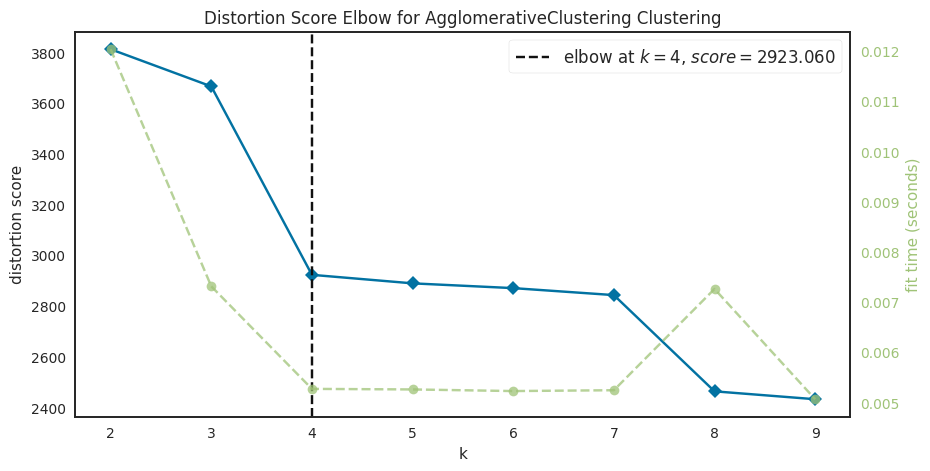

In [88]:
# Instantiate the clustering model and visualizer for average linkage with cityblock metric
visualizer = KElbowVisualizer(AgglomerativeClustering(metric='cityblock',linkage='average'),k=(2,10))

visualizer.fit(X_kc)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

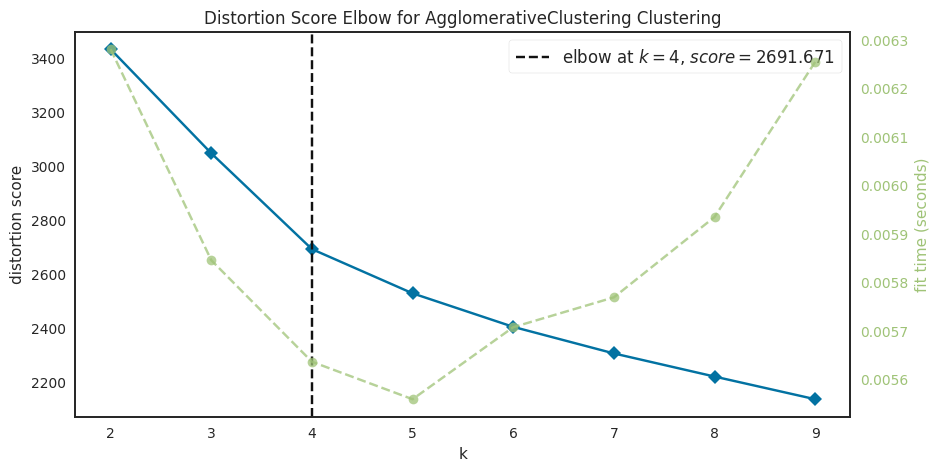

In [89]:
# Instantiate the clustering model and visualizer for ward linkage
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'),k=(2,10))

visualizer.fit(X_kc)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

**Observations**:

* Four clusters appear to be optimal for Ward linkage using the Euclidean distance metric.
* For average linkage with the Cityblock distance metric, the ideal number of clusters is four.
* Using average linkage with the Euclidean distance metric, five clusters seem to be the best fit.

### Analyze with Silhouette coeficients

In [90]:
# Function to plot Silhouette coefficients and find optimal k value
def plot_agglo_silhouette(dm, lm, clusters_list):
  # Create subplots
  fig, axes = plt.subplots(1, len(clusters_list), figsize=(18, 6))

  for idx, cluster in enumerate(clusters_list):
      ax = axes[idx]  # Select subplot axis

      # Apply Agglomerative Clustering
      model = AgglomerativeClustering(n_clusters=cluster, metric=dm, linkage=lm)
      labels = model.fit_predict(X_hc)

      # Compute Silhouette Scores
      silhouette_vals = silhouette_samples(X_hc, labels)
      silhouette_avg = silhouette_score(X_hc, labels)

      y_lower = 10  # Space at the bottom

      for i in range(cluster):
          cluster_silhouette_vals = silhouette_vals[labels == i]
          cluster_silhouette_vals.sort()
          size_cluster_i = cluster_silhouette_vals.shape[0]
          y_upper = y_lower + size_cluster_i

          color = sns.color_palette("nipy_spectral", cluster)[i]
          ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

          # Add cluster label in the middle
          ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Adjust y_lower for next cluster
          y_lower = y_upper + 10

      # Plot settings
      ax.axvline(x=silhouette_avg, color="red", linestyle="--")  # Silhouette score line
      ax.set_xlabel("Silhouette Coefficient")
      ax.set_ylabel("Cluster")
      ax.set_title(f"Agglomerative Clustering - linkage:{lm} - clusters: {cluster}")

  plt.tight_layout()
  plt.show()

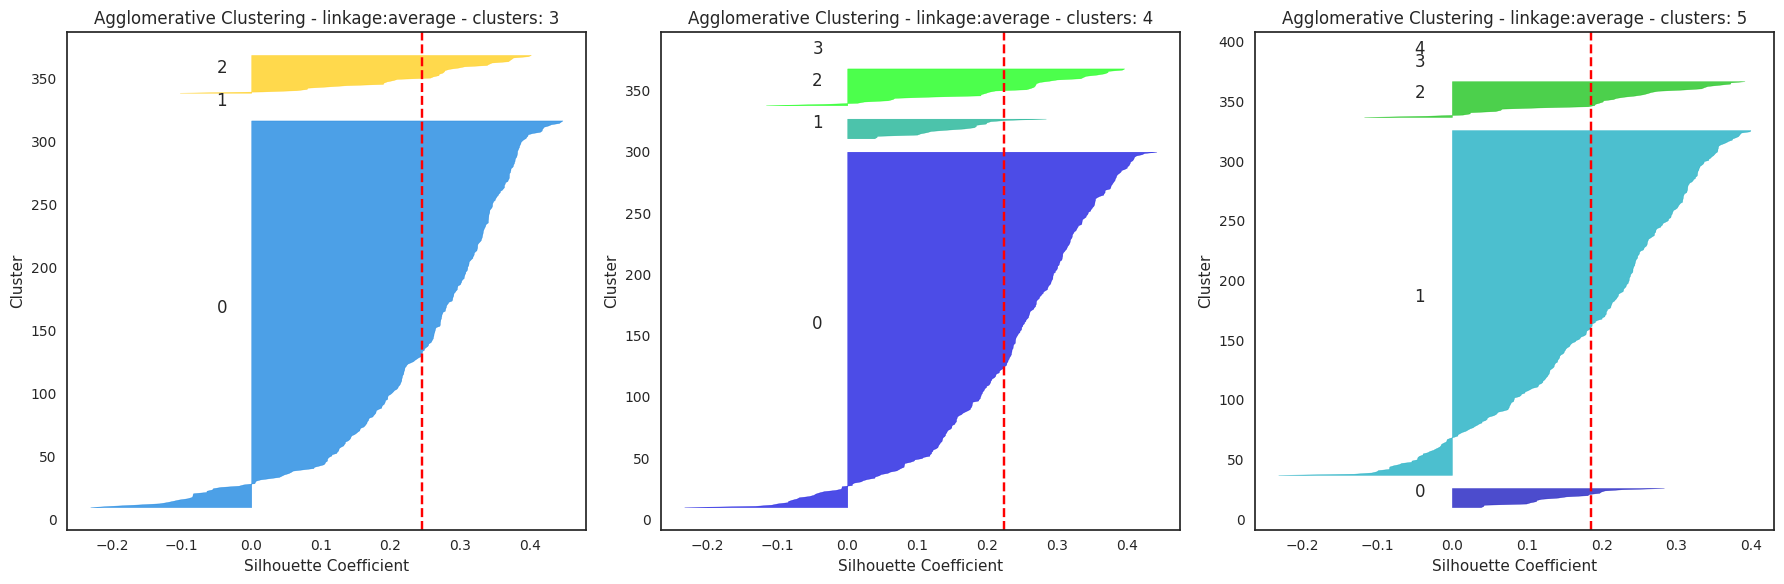

In [91]:
# Agglomerative clusters - average linkage
plot_agglo_silhouette('euclidean','average',[3,4,5])

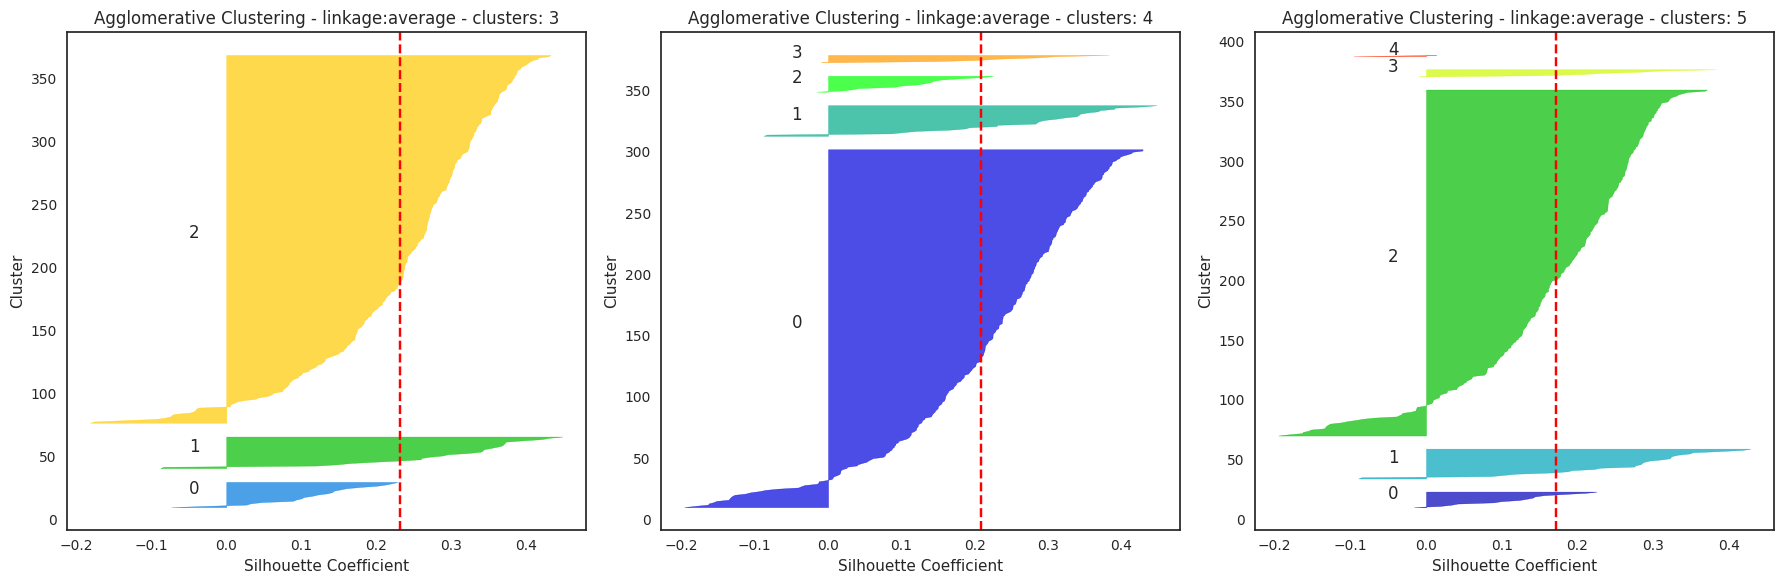

In [92]:
# Agglomerative clusters - average linkage with cityblock distance metric
plot_agglo_silhouette('cityblock','average',[3,4,5])

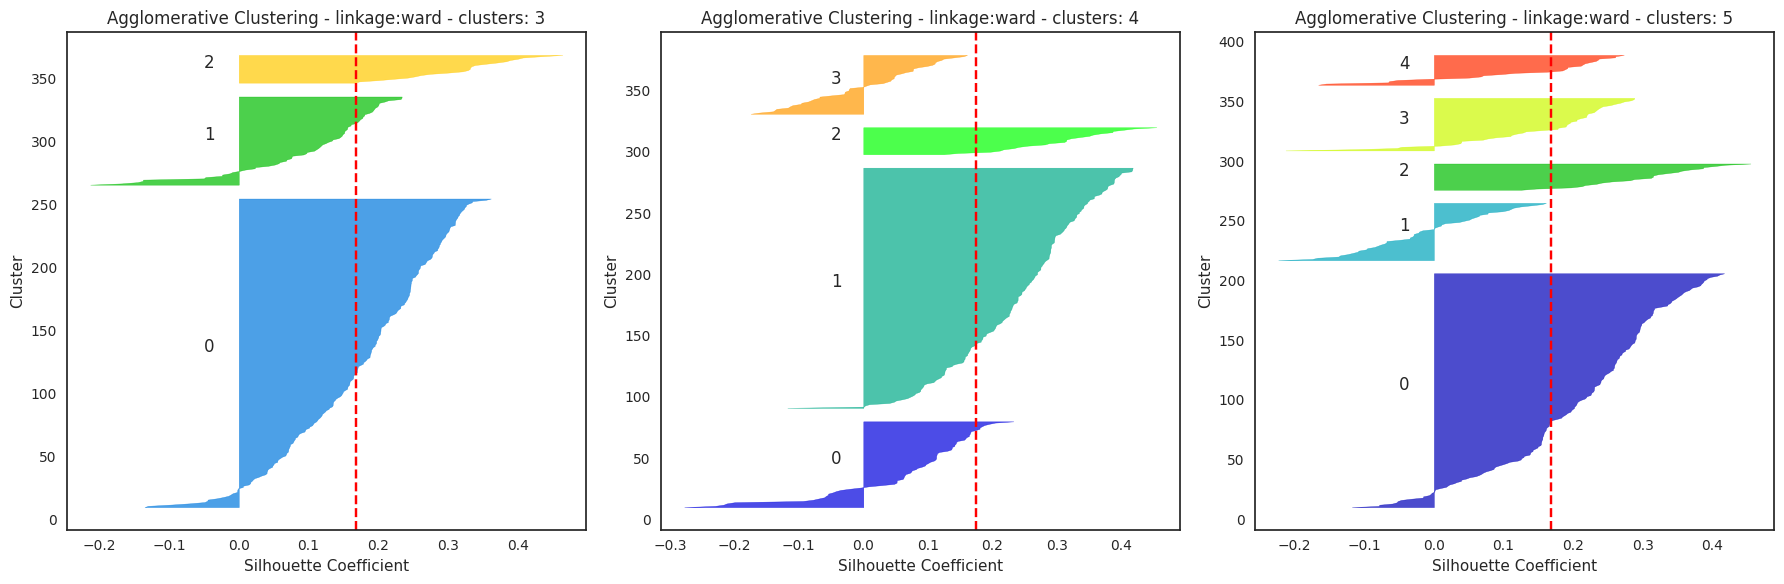

In [93]:
# Agglomerative clusters - ward linkage
plot_agglo_silhouette('euclidean','ward',[3,4,5])

**Observations**:

* Ward linkage and average linkage with the Cityblock distance metric exhibit well-defined clusters.
* Four clusters appear to be the optimal choice.

### Heirarchical Clustering - Final model

Ward linkage with the Euclidean distance metric is selected as it demonstrates well-defined cluster groupings.

Four clusters seem to be the optimal choice

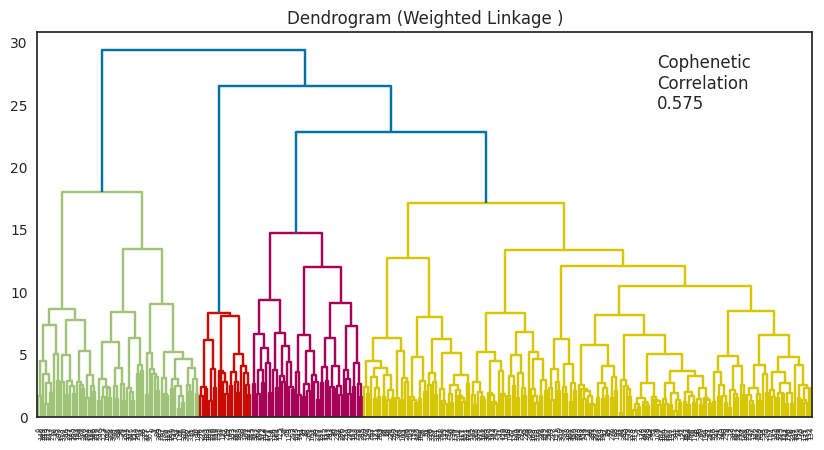

In [94]:
# draw a dendogram with ward linkage and euclidean distance
start_time_h = time.time()
Z = linkage(X_hc, metric="euclidean", method="ward")
end_time_h = time.time() - start_time_h
dendrogram(Z)
plt.title(f"Dendrogram ({method.capitalize()} Linkage )")
coph_corr, coph_dist = cophenet(Z, pdist(X_hc))
plt.annotate(
      f"Cophenetic\nCorrelation\n{coph_corr:0.3f}",
      (0.80, 0.80),
      xycoords="axes fraction",
)
plt.show()

In [95]:
# lets find the dendogram distance at which we get K=4 clusters using the formula Z[-(k-1),2]
den_distance = Z[-3,2]
print(f"Dendogram distance for 4 clusters: {den_distance}")

Dendogram distance for 4 clusters: 22.835809350866263


In [96]:
# lets verify the number of clusters with dendogram distance
set(fcluster(Z, 22.83, criterion='distance'))

{1, 2, 3, 4}

**Observations**:

At a distance of 22.83, the hierarchical clustering splits into four distinct clusters.

In [97]:
# create Agglomerative clustering model with 4 clusters
start_time_ag = time.time()
aggClustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
aggClustering.fit(X_hc)
end_time_ag = time.time() - start_time_ag
aggClustering

AgglomerativeClustering(n_clusters=4)

In [98]:
# add Clustering labels
X_hc['H Segments'] = aggClustering.labels_
df["H Segments"] = aggClustering.labels_
df.drop('K Means Segments', axis=1,inplace=True)

In [99]:
# form the cluster profile with mean values for each segment
agg_cluster_profile = df.groupby('H Segments').mean()
agg_cluster_profile['Count in H Segments'] = df.groupby('H Segments')['Current Price'].count().values

# Highlight Max value
agg_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [100]:
agg_cluster_profile.style.highlight_min(color="lightyellow", axis=0)

**Observations**:

* Cluster 0 consists of stocks with high Price, Net Income, Earnings Per Share, and Estimated Shares Outstanding. These stocks exhibit stable volatility and are relatively cheaper.

* Cluster 1 has moderate financial metrics and contains the highest number of stocks. It has the lowest Estimated Shares Outstanding and a negative P/B ratio.

* Cluster 2 includes riskier stocks characterized by high ROE and P/E Ratio, but lower Current Price, Cash Ratio, Net Cash Flow, and Net Income.

* Cluster 3 features stocks with high Current Price, Cash Ratio, Net Cash Flow, Net Income, and P/B Ratio, but lower ROE.

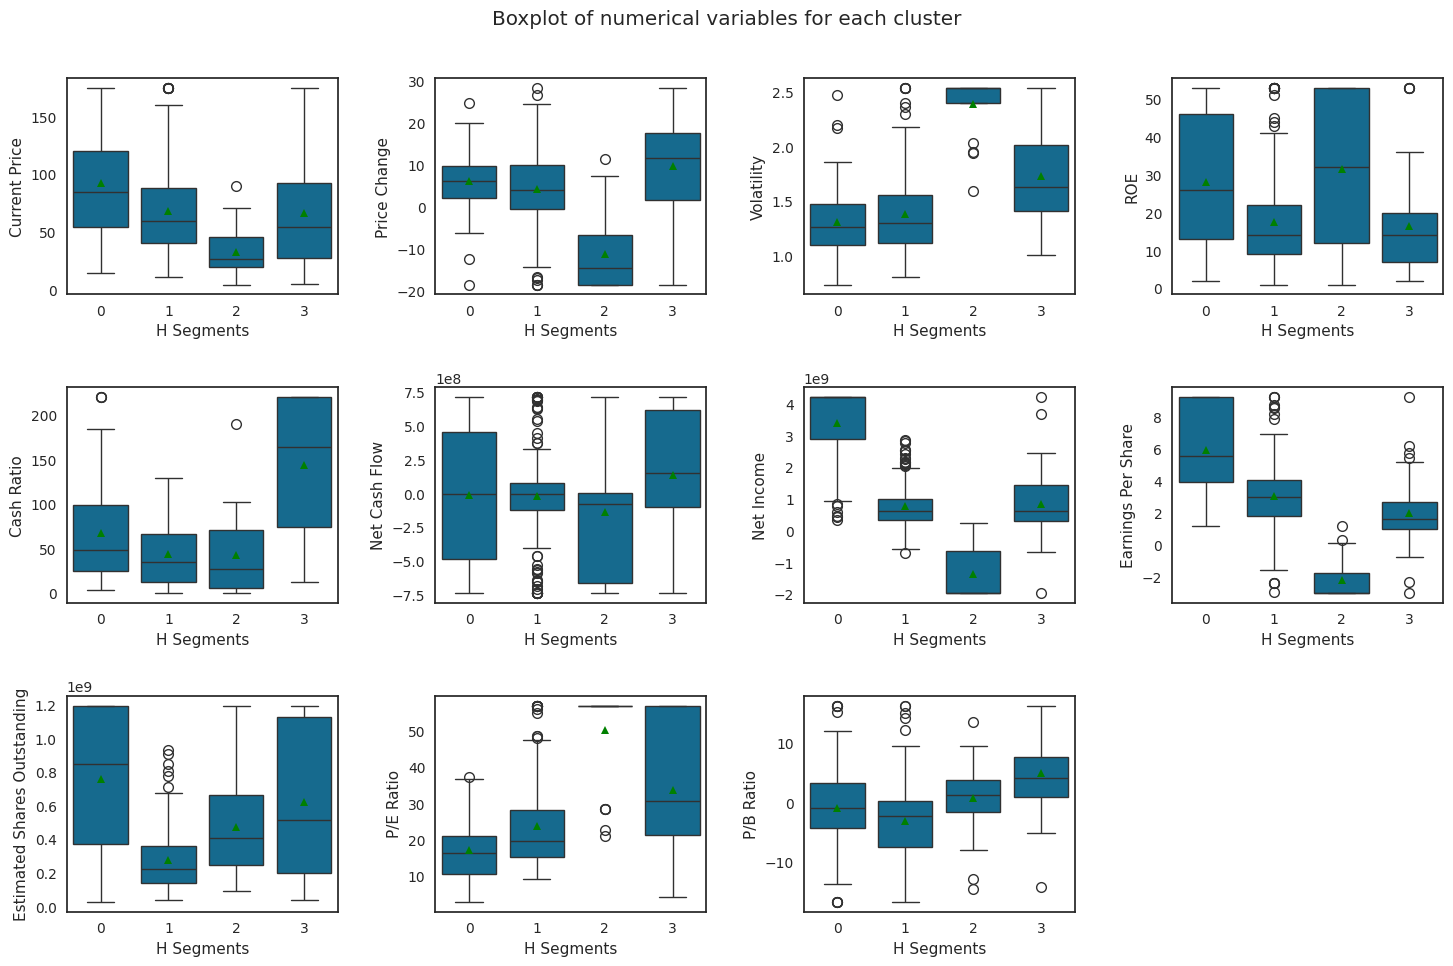

In [101]:
# Analyze the clusters by variables
cluster_box_plots("H Segments")

**Observations**:

* There is considerable feature overlap across different cluster groups.
* The average Current Price is highest in Cluster 0 and lowest in Cluster 2.
* The average Price Change is highest in Cluster 3 and lowest in Cluster 2.
* The mean Volatility is highest in Cluster 2 and lowest in Cluster 0.
* ROE is strong in Cluster 2 and low in Cluster 3.
* The mean Cash Ratio is highest in Cluster 3 and lowest in Cluster 2.
* The mean Net Cash Flow is highest in Cluster 3 and lowest in Cluster 2.
* The average Net Income is highest in Cluster 0 and lowest in Cluster 2.
* The average Earnings Per Share is highest in Cluster 0 and lowest in Cluster 2.
* The average Estimated Shares Outstanding is highest in Cluster 0 and lowest in Cluster 1.
* The mean P/E Ratio is highest in Cluster 2 and lowest in Cluster 0.
* The mean P/B Ratio is highest in Cluster 3 and negative in Cluster 1.

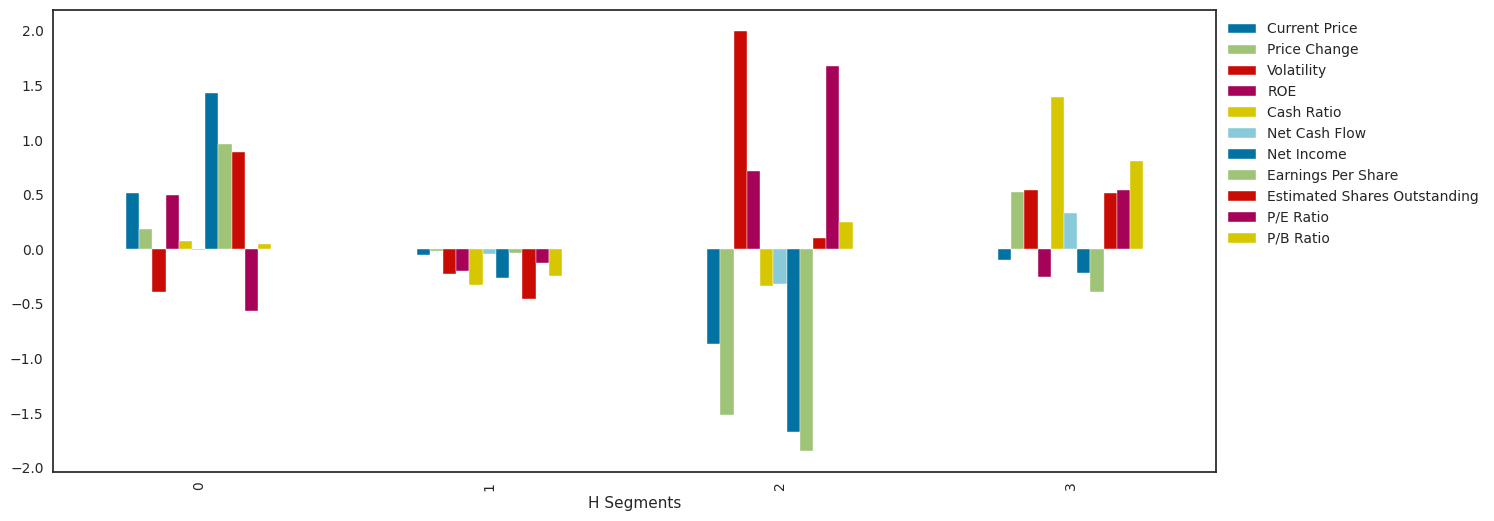

In [102]:
# Analyze the cluster groups with help of barcharts on scaled data

X_hc.groupby("H Segments").mean().plot.bar(figsize=(15, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

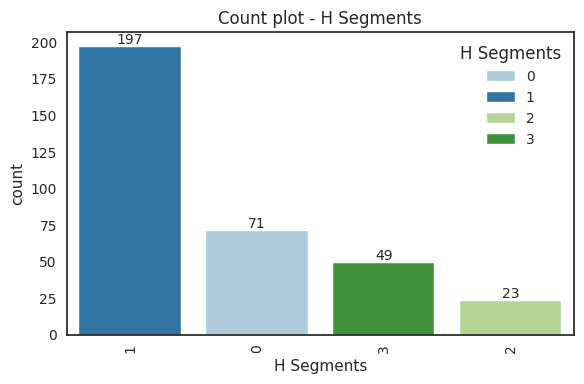

In [103]:
# lets plot the counts in each segment
labelled_barplot(df, ['H Segments'] ,cols=1, figsize=(6,4))

**Observations**:


**Cluster 0**:

* Highly profitable stocks with strong ROE and EPS
* Stable with low volatility
* Slightly negative cash flow

**Cluster 1**:

* Largest cluster likely representing the market behavior
* Stocks are stable but show only moderate performance
* Low liquidity and slightly negative cash flow
* Slightly undervalued, suggesting potential for growth

**Cluster 2**:

* High volatility, loss-making stocks
* Poor cash flow and negative earnings
* High ROE might indicate a potential turnaround

**Cluster 3**:

* Highly liquid stocks with strong cash flow
* Strong price growth
* Moderate earnings performance
* Lower ROE suggests inefficiency

## K-Means vs Hierarchical Clustering

### Comparison of Characterstics

**K-Means Clustering Summary**:

Cluster 0 : Strong profitability, stable, low-risk investments

Cluster 1 : Highly liquid, stable prices, but weak profitability

Cluster 2 : High-risk, volatile stocks with growth potential (least data points)

Cluster 3: Weak fundamentals and underperforming stocks ( highest data points)

In [104]:
dfas['K Means Segments'] = kmeans.labels_
dfas[dfas['K Means Segments'] == 0]['GICS Sub Industry'].value_counts().head()

GICS Sub Industry
Banks                       7
Pharmaceuticals             5
Airlines                    4
Industrial Conglomerates    4
Consumer Finance            4
Name: count, dtype: int64

In [105]:
dfas[dfas['K Means Segments'] == 3]['GICS Sub Industry'].value_counts().head()

GICS Sub Industry
REITs                       11
MultiUtilities              10
Electric Utilities          10
Industrial Conglomerates     8
Health Care Equipment        5
Name: count, dtype: int64

**Observations**:

* Banks, Pharmaceuticals, Airlines and Industrial Conglomerates are few good sub sectors that are performing well.

* REITs, MultiUtilites, Electric Utilities are few sub sectors that are not performing well

**Hierarchical Clustering - Summary**:

Cluster 0 : Best choice for stable, high-growth stocks

Cluster 1 : Moderate performers with some undervaluation potential (highest data points)

Cluster 2 : High-risk stocks with deep losses and volatility (least data points)

Cluster 3 : Best for liquidity-focused defensive investors

In [106]:
dfas['H Segments'] = aggClustering.labels_
dfas[dfas['H Segments'] == 0]['GICS Sub Industry'].value_counts().head()

GICS Sub Industry
Banks                                              7
Industrial Conglomerates                           5
Airlines                                           4
Pharmaceuticals                                    4
Oil & Gas Refining & Marketing & Transportation    3
Name: count, dtype: int64

In [107]:
dfas[dfas['H Segments'] == 1]['GICS Sub Industry'].value_counts().head()

GICS Sub Industry
Electric Utilities          11
MultiUtilities              11
REITs                       11
Industrial Conglomerates     9
Health Care Equipment        6
Name: count, dtype: int64

**Observations**:

* Banks, Pharmaceuticals, Airlines and Industrial Conglomerates are few good sub sectors that are performing well.

* REITs, MultiUtilites, Electric Utilities are few sub sectors that are not performing well

**Comparision**:

* Both models identify four clusters with similar characteristics.
* Cluster 0 emerges as the best-performing group in both models.
* Cluster 3 in K-Means clustering reflects market trends.
* Cluster 1 in Hierarchical clustering captures market trends.
* Both models classify risky stocks under Cluster 2.
* Since both models have similar Silhouette coefficients and exhibit some misclassifications, it suggests that neither model is significantly better than the other in terms of clustering quality

### Computation times

Lets compare the computation time between K-Means and Heirarchical clusters

In [108]:
print(f"Computation time for K-Means clustering: {end_time_k}")

Computation time for K-Means clustering: 0.025537490844726562


In [109]:
print(f"Computation time for Heirarchical clustering: {end_time_h}")

Computation time for Heirarchical clustering: 0.006871700286865234


It is interesting that K-Means clustering performed faster than Hierarchical clustering in this case. This could be due to the smaller dataset size and the limited number of iterations required to align centroids in K-Means. Generally, Hierarchical clustering is more computationally expensive because it involves computing pairwise distances at each step, making it slower, especially for larger datasets

Lets compute the times for larger datasets using make_blobs

In [110]:
# Define dataset sizes
dataset_sizes = [100, 500, 1000, 2000, 5000, 10000]  # Increasing number of points
kmeans_times = []
hierarchical_times = []

for n_samples in dataset_sizes:
    # Generate synthetic data with 'n_samples' points
    Xs, _ = make_blobs(n_samples=n_samples, centers=5, random_state=42)

    # Measure K-Means execution time
    start_time = time.time()
    kmeanst = KMeans(n_clusters=5, random_state=42, n_init=10)
    kmeanst.fit(Xs)
    kmeans_times.append(time.time() - start_time)

    # Measure Hierarchical Clustering execution time
    start_time = time.time()
    hierarchical = AgglomerativeClustering(n_clusters=5)
    hierarchical.fit(Xs)
    hierarchical_times.append(time.time() - start_time)

dfc = pd.DataFrame({ "Dataset Size": dataset_sizes,
                     "K Means Time" : kmeans_times,
                     "Agglomerative Time": hierarchical_times } )
dfc

Dataset Size  K Means Time  Agglomerative Time
0           100          0.01                0.00
1           500          0.01                0.01
2          1000          0.01                0.02
3          2000          0.01                0.08
4          5000          0.03                0.75
5         10000          0.05                3.31

**Observation**:

It is as expected that Hierarchical clustering takes more time as the dataset size increases. This is because it requires computing and storing pairwise distances between all data points.

## PCA - Dimensionality Reduction

In [111]:
X.head()

Current Price  Price Change  Volatility   ROE  Cash Ratio  Net Cash Flow  \
0          -0.65          0.55        0.45  2.12       -0.21          -1.43   
1          -0.26          0.39        1.57  2.12        0.24           0.13   
2          -0.59          0.68       -0.46  0.03        0.07           1.72   
3           0.55          0.94       -0.27 -0.75        2.01          -0.57   
4          -0.35         -0.60        0.48 -0.43        2.70           0.76   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0        1.98                2.11                          0.65      -1.49   
1        1.98                0.02                          2.12      -0.46   
2        1.98               -0.05                          2.12      -0.70   
3       -0.37               -0.64                          0.17       2.14   
4       -0.33               -0.96                          2.12       2.14   

   P/B Ratio  
0      -1.00  
1      -0.99  
2       0.11  
3       0.71  
4       0.30

In [112]:
# Reduce dimensions using PCA
pca = PCA(n_components=11)
X_reduced_pca = pca.fit_transform(X)
X_reduced_pca = pd.DataFrame(X_reduced_pca, columns=['comp1','comp2','comp3','comp4','comp5','comp6', 'comp7','comp8','comp9','comp10','comp11'])
X_reduced_pca['K Means Segments'] = X_kc['K Means Segments']

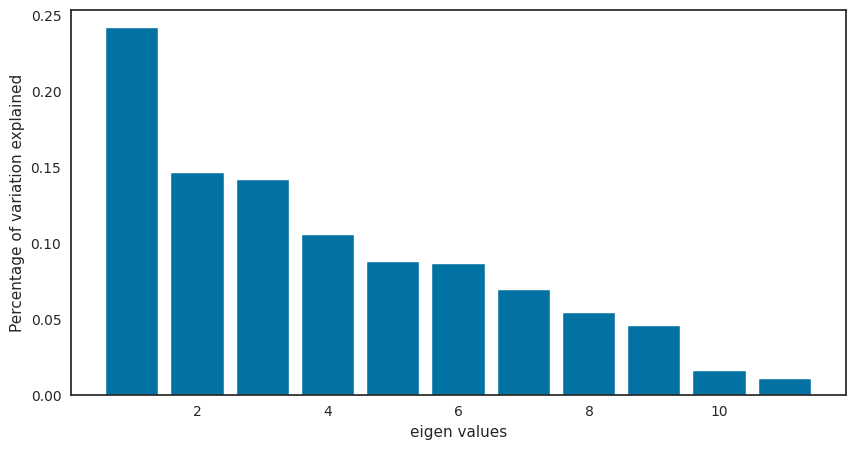

In [113]:
# plot the bar plot for eigen values
plt.bar(list(range(1,12)), pca.explained_variance_ratio_)
plt.xlabel("eigen values")
plt.ylabel("Percentage of variation explained")
plt.show()

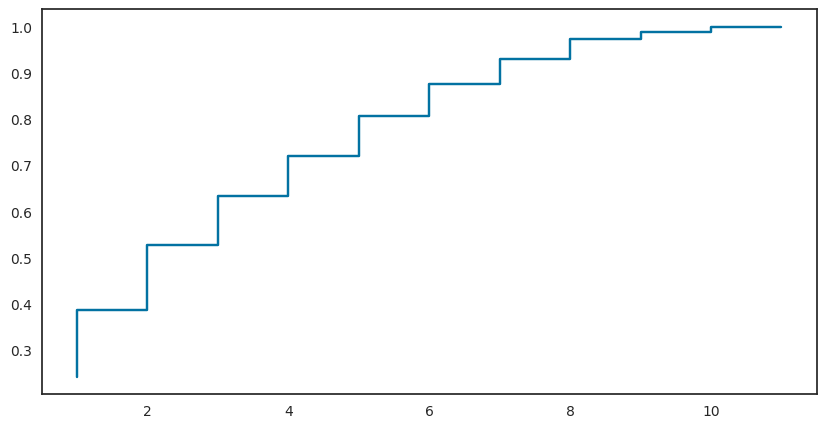

In [114]:
# plot step graph for cumulative eigen values
plt.step(list(range(1,12)), np.cumsum(pca.explained_variance_ratio_));

**Observations**:

* The first eight components explains about 90% of variation

In [115]:
# visualize the clusters for first 3 PCA components
fig = px.scatter_3d(X_reduced_pca, x='comp1', y='comp2', z='comp3', color='K Means Segments')
fig.show()

**Observations**:

The clustering groups are almost clear identified with first three components

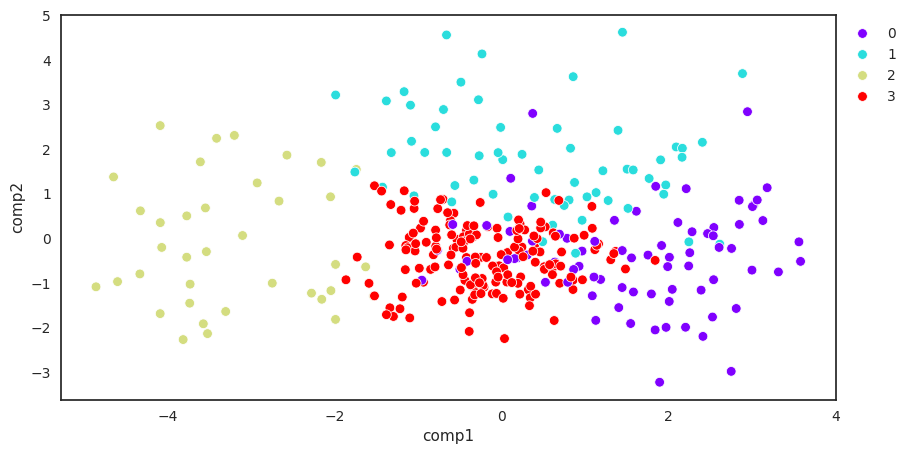

In [116]:
# visualize the clusters with the first two PCA components
sns.scatterplot(X_reduced_pca, x='comp1', y='comp2', hue='K Means Segments', palette="rainbow")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**Observations**:

* The cluster groups are not clearly identified as there are some overlaps with two components.

## Actionable insights

* Investors should focus on stocks with strong EPS growth, as they have a higher probability of price appreciation.

* Growth-oriented investors may consider stocks with higher P/E ratios, while value investors may look for undervalued stocks with lower P/E ratios

* Investors seeking stability should look for stocks with lower volatility, as they are less likely to experience sharp price swings

* Long-term investors should focus on Cluster 0 & 1 in K-Means and Cluster 0 & 3 in Hierarchical.

* Risk-tolerant traders should focus on Cluster 2 in both models that offers speculative opportunities.

* For stable, low-risk portfolios Cluster 3 in K-Means & Cluster 3 in Hierarchical is a good choice.

* Cluster 1 in K-Means offers strong potential for growth investors

## Recommendations

* Hierarchical clustering is preferred as it allows dynamic determination of the optimal number of clusters.

* Validation with stock domain experts is necessary to ensure that the derived clusters align with real-world market behavior.

* Exploring other clustering models can help minimize misclassifications, and further analysis of different linkage methods in hierarchical clustering can optimize the model selection.

* Feature Engineering and Principal Component Analysis (PCA) should be leveraged to enhance model performance.